In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis

In [2]:
data = pd.read_csv('1960_onwards.csv')
data

,Year,Consumer price index (2010 = 100),GDP (constant LCU),GDP (current LCU),GDP growth (annual %),GDP per capita (current US$),GDP per capita growth (annual %),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)",Livestock production index (2014-2016 = 100),...,Other Assets Net,Money Supply M2,CBN Bills,Special Intervention Reserves,GDPBillions of US $,Per CapitaUS $,Growth RateAnnual % Change,Petrol Price (Naira),Food imports (% of merchandise imports),Food exports (% of merchandise imports)
0,1960,0.065886,9.277980e+12,2.997269e+09,0.191795,93.397048,-1.834010,6.257169,5.444327,17.19,...,4.49,272.40,2447132.17,258214.99,4.196175,93.3970,0.0000,0.05,14.129951,64.523594
1,1961,0.070023,9.295770e+12,3.190921e+09,0.191795,97.420968,-1.834010,6.257169,6.279147,17.19,...,-14.56,292.83,2447132.17,258214.99,4.467288,97.4210,0.1918,0.05,14.129951,64.523594
2,1962,0.073710,9.677180e+12,3.506715e+09,4.102993,104.852749,1.954451,5.565301,5.265632,15.71,...,-17.91,325.43,2447132.17,258214.99,4.909399,104.8527,4.1030,0.05,14.129951,64.523594
3,1963,0.071724,1.050730e+13,3.689709e+09,8.578619,108.015742,6.306528,-3.094752,-2.694655,15.95,...,-9.20,361.82,2447132.17,258214.99,5.165590,108.0157,8.5786,0.05,12.139264,62.312145
4,1964,0.072338,1.102750e+13,3.966381e+09,4.950489,113.658375,2.729816,2.427809,0.856793,17.60,...,-0.49,430.49,2447132.17,258214.99,5.552931,113.6584,4.9505,0.05,9.237443,61.003786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2020,302.939394,7.080050e+13,1.542520e+14,-1.794253,2074.613747,-4.162059,7.849142,13.246023,111.48,...,3998185.81,33314521.33,2723489.03,317234.17,432.198898,2074.6137,-1.7943,1.65,14.626081,2.982721
61,2021,354.296242,7.338280e+13,1.760760e+14,3.647187,2065.774410,1.182828,10.131034,16.952846,111.54,...,4678119.71,39955126.37,415285.94,340377.25,440.838992,2065.7744,3.6472,1.68,14.164497,3.280086
62,2022,421.071120,7.576890e+13,2.023650e+14,3.251681,2162.633734,0.823296,11.311335,18.847188,112.91,...,6882611.86,48421940.59,42475.94,375808.20,472.624597,2162.6337,3.2517,1.95,11.425529,2.753877
63,2023,421.071120,7.576890e+13,2.023650e+14,3.251681,2162.633734,0.823296,11.311335,18.847188,112.91,...,9934871.45,62955753.61,490843.62,340630.66,472.624597,2162.6337,3.2517,6.26,14.716258,12.638645


In [3]:
data.columns

Index(['Year', 'Consumer price index (2010 = 100)', 'GDP (constant LCU)',
       'GDP (current LCU)', 'GDP growth (annual %)',
       'GDP per capita (current US$)', 'GDP per capita growth (annual %)',
       'Inflation, GDP deflator (annual %)',
       'Inflation, consumer prices (annual %)',
       'Livestock production index (2014-2016 = 100)',
       'Official exchange rate (LCU per US$, period average)',
       'Total reserves (includes gold, current US$)', 'Population, total',
       'Population, female', 'Population, male',
       'Population ages 0-14 (% of total population)',
       'Population ages 15-64 (% of total population)',
       'Population ages 65 and above (% of total population)',
       'Trade Openness Index(%)', 'Crude oil price(per barrel in $)',
       'Cumulative crude oil production up to and including year',
       'Narrow Money', 'Money Supply M3', 'Net Foreign Assets',
       'Net Domestic Credit', 'Credit to Government',
       'Credit to Private Sector',

In [4]:
selected_col = ['Year', 'Consumer price index (2010 = 100)', 'GDP (constant LCU)',
       'GDP (current LCU)', 'GDP growth (annual %)',
       'GDP per capita (current US$)', 'GDP per capita growth (annual %)',
       'Inflation, GDP deflator (annual %)',
       'Inflation, consumer prices (annual %)','Population, total','Trade Openness Index(%)', 'Crude oil price(per barrel in $)','Cumulative crude oil production up to and including year',
       'Narrow Money', 'Money Supply M3', 'Net Foreign Assets',
       'Net Domestic Credit', 'Credit to Government',
       'Credit to Private Sector', 'Base Money', 'Currency in Circulation',
       'Bank Reserves', 'Currency Outside Banks', 'Demand Deposits',
       'Quasi Money', 'Net Domestic Assets', 'Other Assets Net',
       'Money Supply M2', 'CBN Bills', 'Special Intervention Reserves',
       'GDPBillions of US $', 'Per CapitaUS $', 'Growth RateAnnual % Change',
       'Petrol Price (Naira)', 'Food imports (% of merchandise imports)',
       'Food exports (% of merchandise imports)']

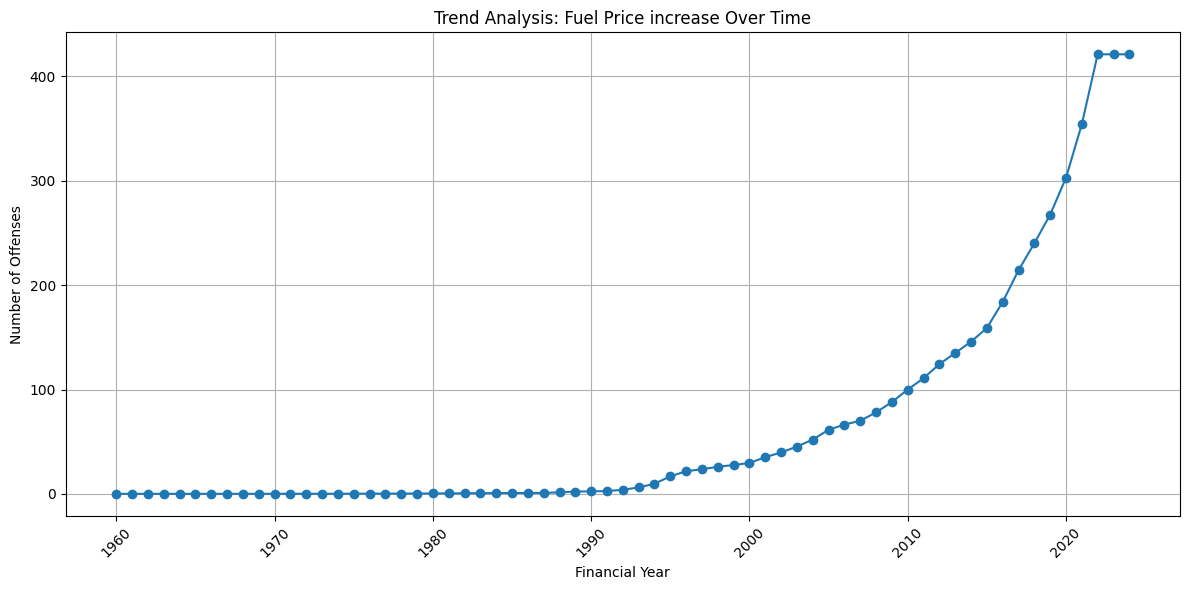

In [5]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['Year'],data['Consumer price index (2010 = 100)'], marker='o', linestyle='-')
plt.title('Trend Analysis: Fuel Price increase Over Time')
plt.xlabel('Financial Year')
plt.xticks(rotation=45)
plt.ylabel('Number of Offenses')
plt.grid(True)
plt.tight_layout()
plt.show()

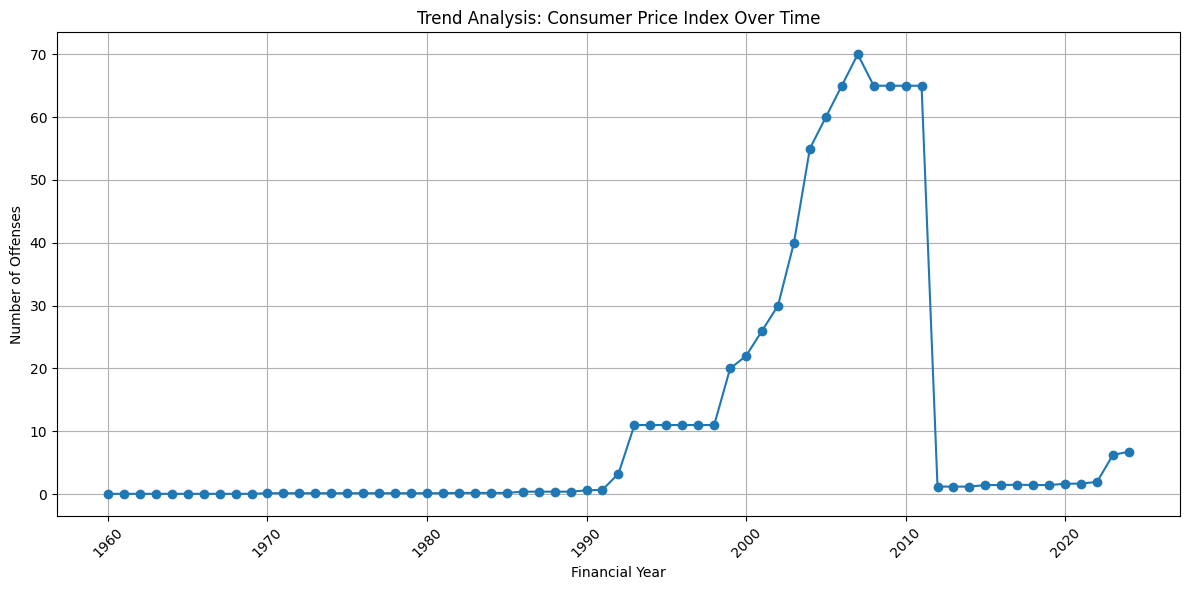

In [6]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['Year'],data['Petrol Price (Naira)'], marker='o', linestyle='-')
plt.title('Trend Analysis: Consumer Price Index Over Time')
plt.xlabel('Financial Year')
plt.xticks(rotation=45)
plt.ylabel('Number of Offenses')
plt.grid(True)
plt.tight_layout()
plt.show()

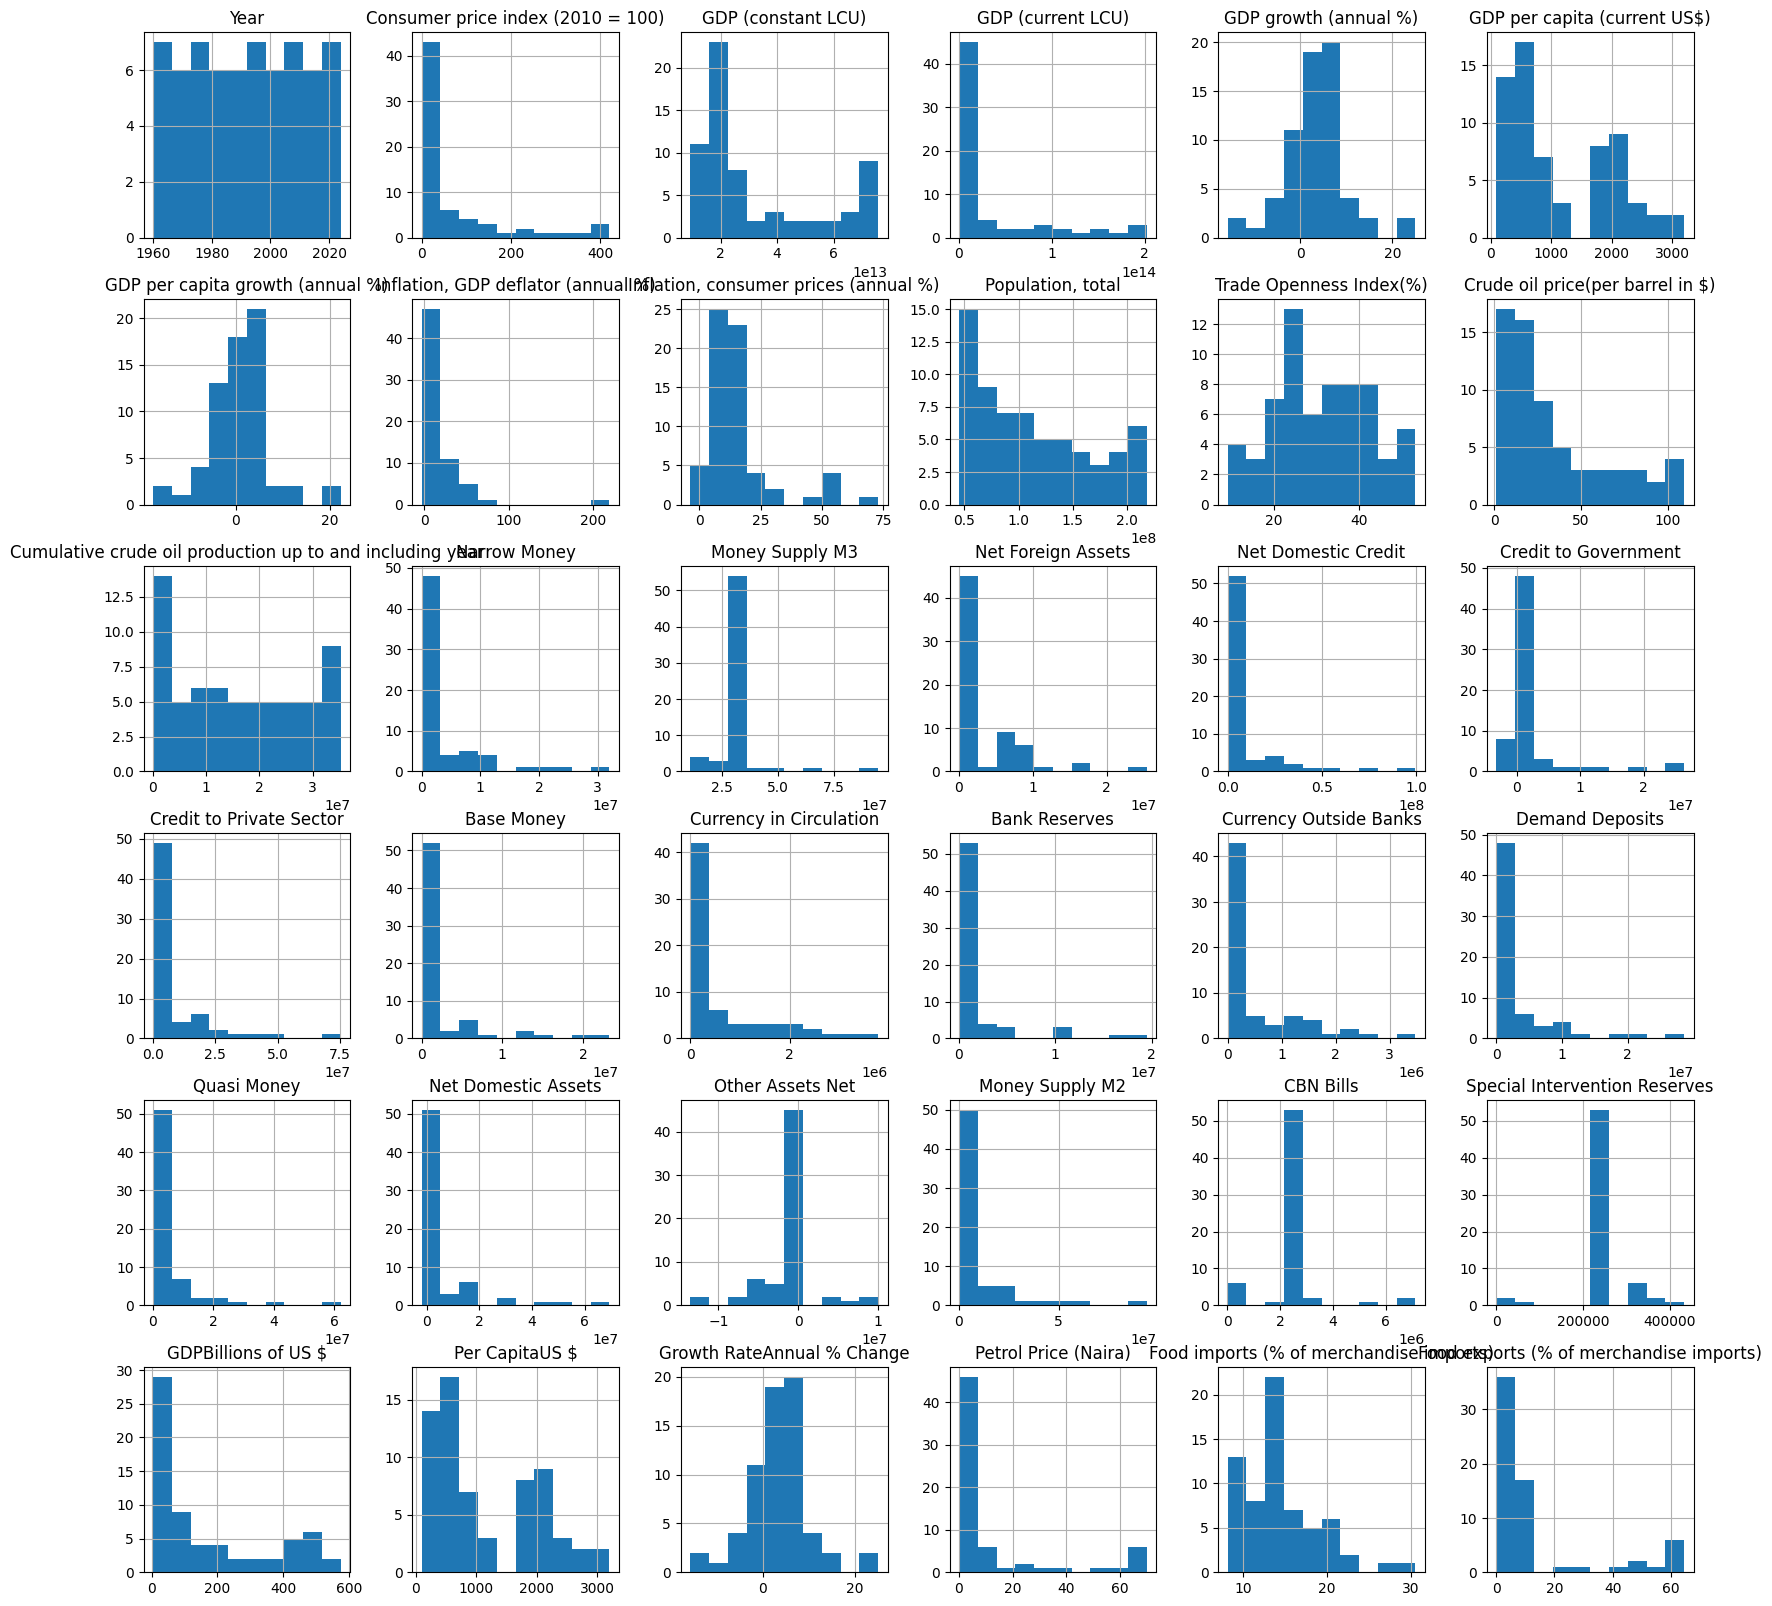

In [7]:
data[selected_col].hist(figsize=(20, 20))
plt.show()

In [8]:
def select_bell_curve_features(df, skew_threshold =0.5, kurtosis_threshold = 1.0):
    selected_features = []
    for cols in df.columns:
        skewness = skew(df[cols])
        kurt = kurtosis(df[cols])
        if abs(skewness) <= skew_threshold and abs(kurt - 3)<= kurtosis_threshold:
            selected_features.append(cols)
    return selected_features

In [9]:

# plt.figure(figsize=(20, 20))  # Adjust figure size as needed

# selected_cols = data[selected_col]
# for col in data:
#     plt.plot(data[col], label=col)  # Plot each column as a line

# # Customize your plot for better visualization
# plt.xlabel("Index")  # Or specific column name if applicable
# plt.ylabel("Values")
# plt.title(f"Line Plots for {col}")
# plt.legend()  # Add legend to distinguish lines
# plt.grid(True)  # Add grid lines for readability

# plt.show()

In [10]:
sel_features = select_bell_curve_features(data)
sel_features

['GDP growth (annual %)',
 'GDP per capita growth (annual %)',
 'Other Assets Net',
 'Growth RateAnnual % Change']

In [11]:
met_col = ['Year','Crude oil price(per barrel in $)']
tablel = data[met_col]
table2 = data[sel_features]
sel_table = pd.DataFrame(tablel.join(table2))
sel_table

,Year,Crude oil price(per barrel in $),GDP growth (annual %),GDP per capita growth (annual %),Other Assets Net,Growth RateAnnual % Change
0,1960,1.63,0.191795,-1.834010,4.49,0.0000
1,1961,1.57,0.191795,-1.834010,-14.56,0.1918
2,1962,1.53,4.102993,1.954451,-17.91,4.1030
3,1963,1.50,8.578619,6.306528,-9.20,8.5786
4,1964,1.45,4.950489,2.729816,-0.49,4.9505
...,...,...,...,...,...,...
60,2020,41.47,-1.794253,-4.162059,3998185.81,-1.7943
61,2021,69.89,3.647187,1.182828,4678119.71,3.6472
62,2022,100.08,3.251681,0.823296,6882611.86,3.2517
63,2023,82.95,3.251681,0.823296,9934871.45,3.2517


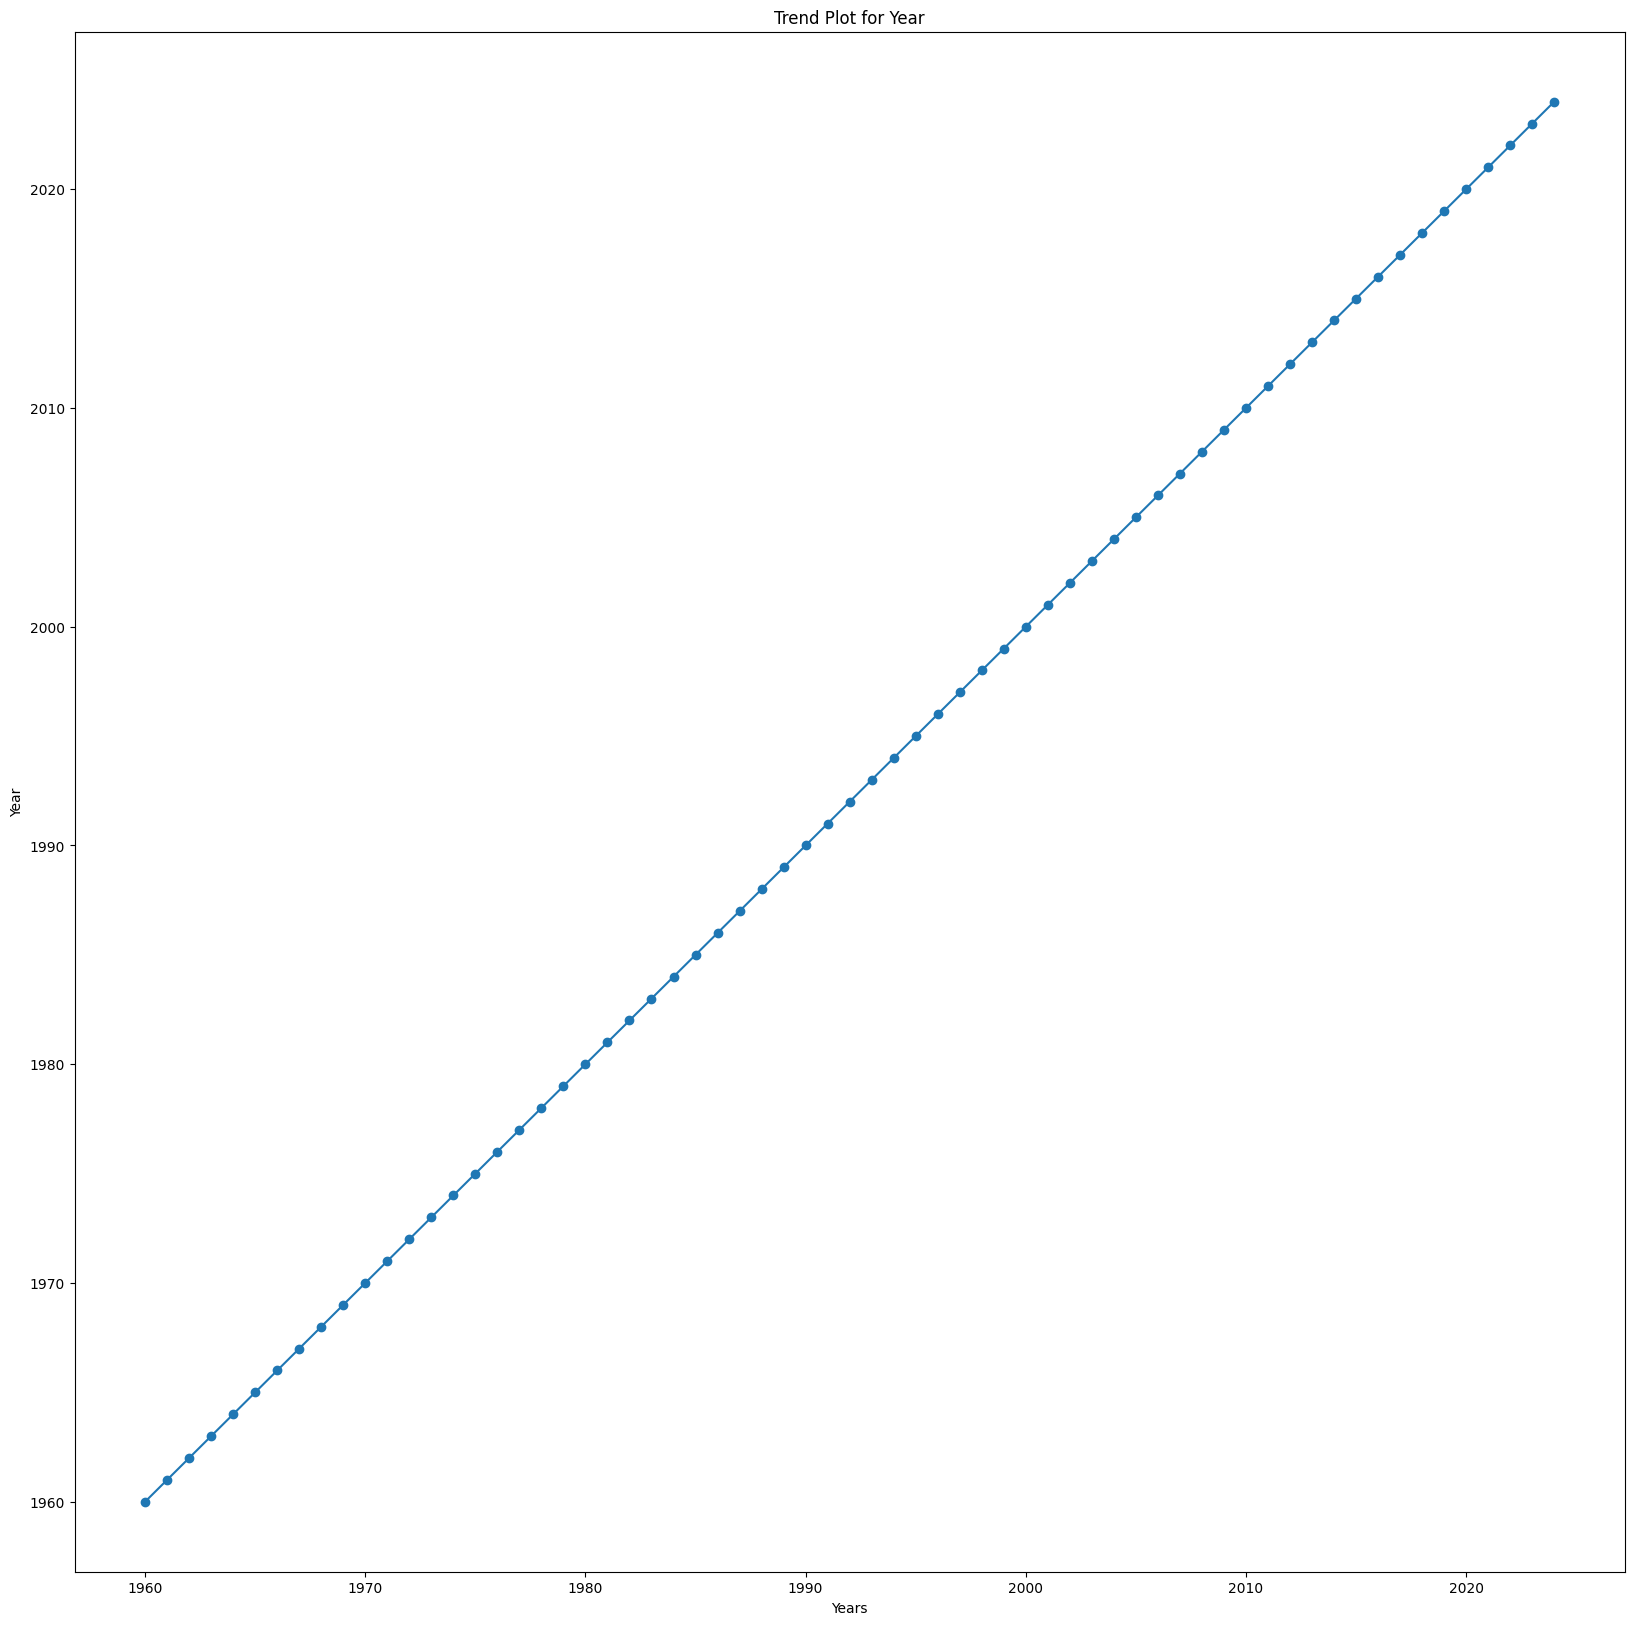

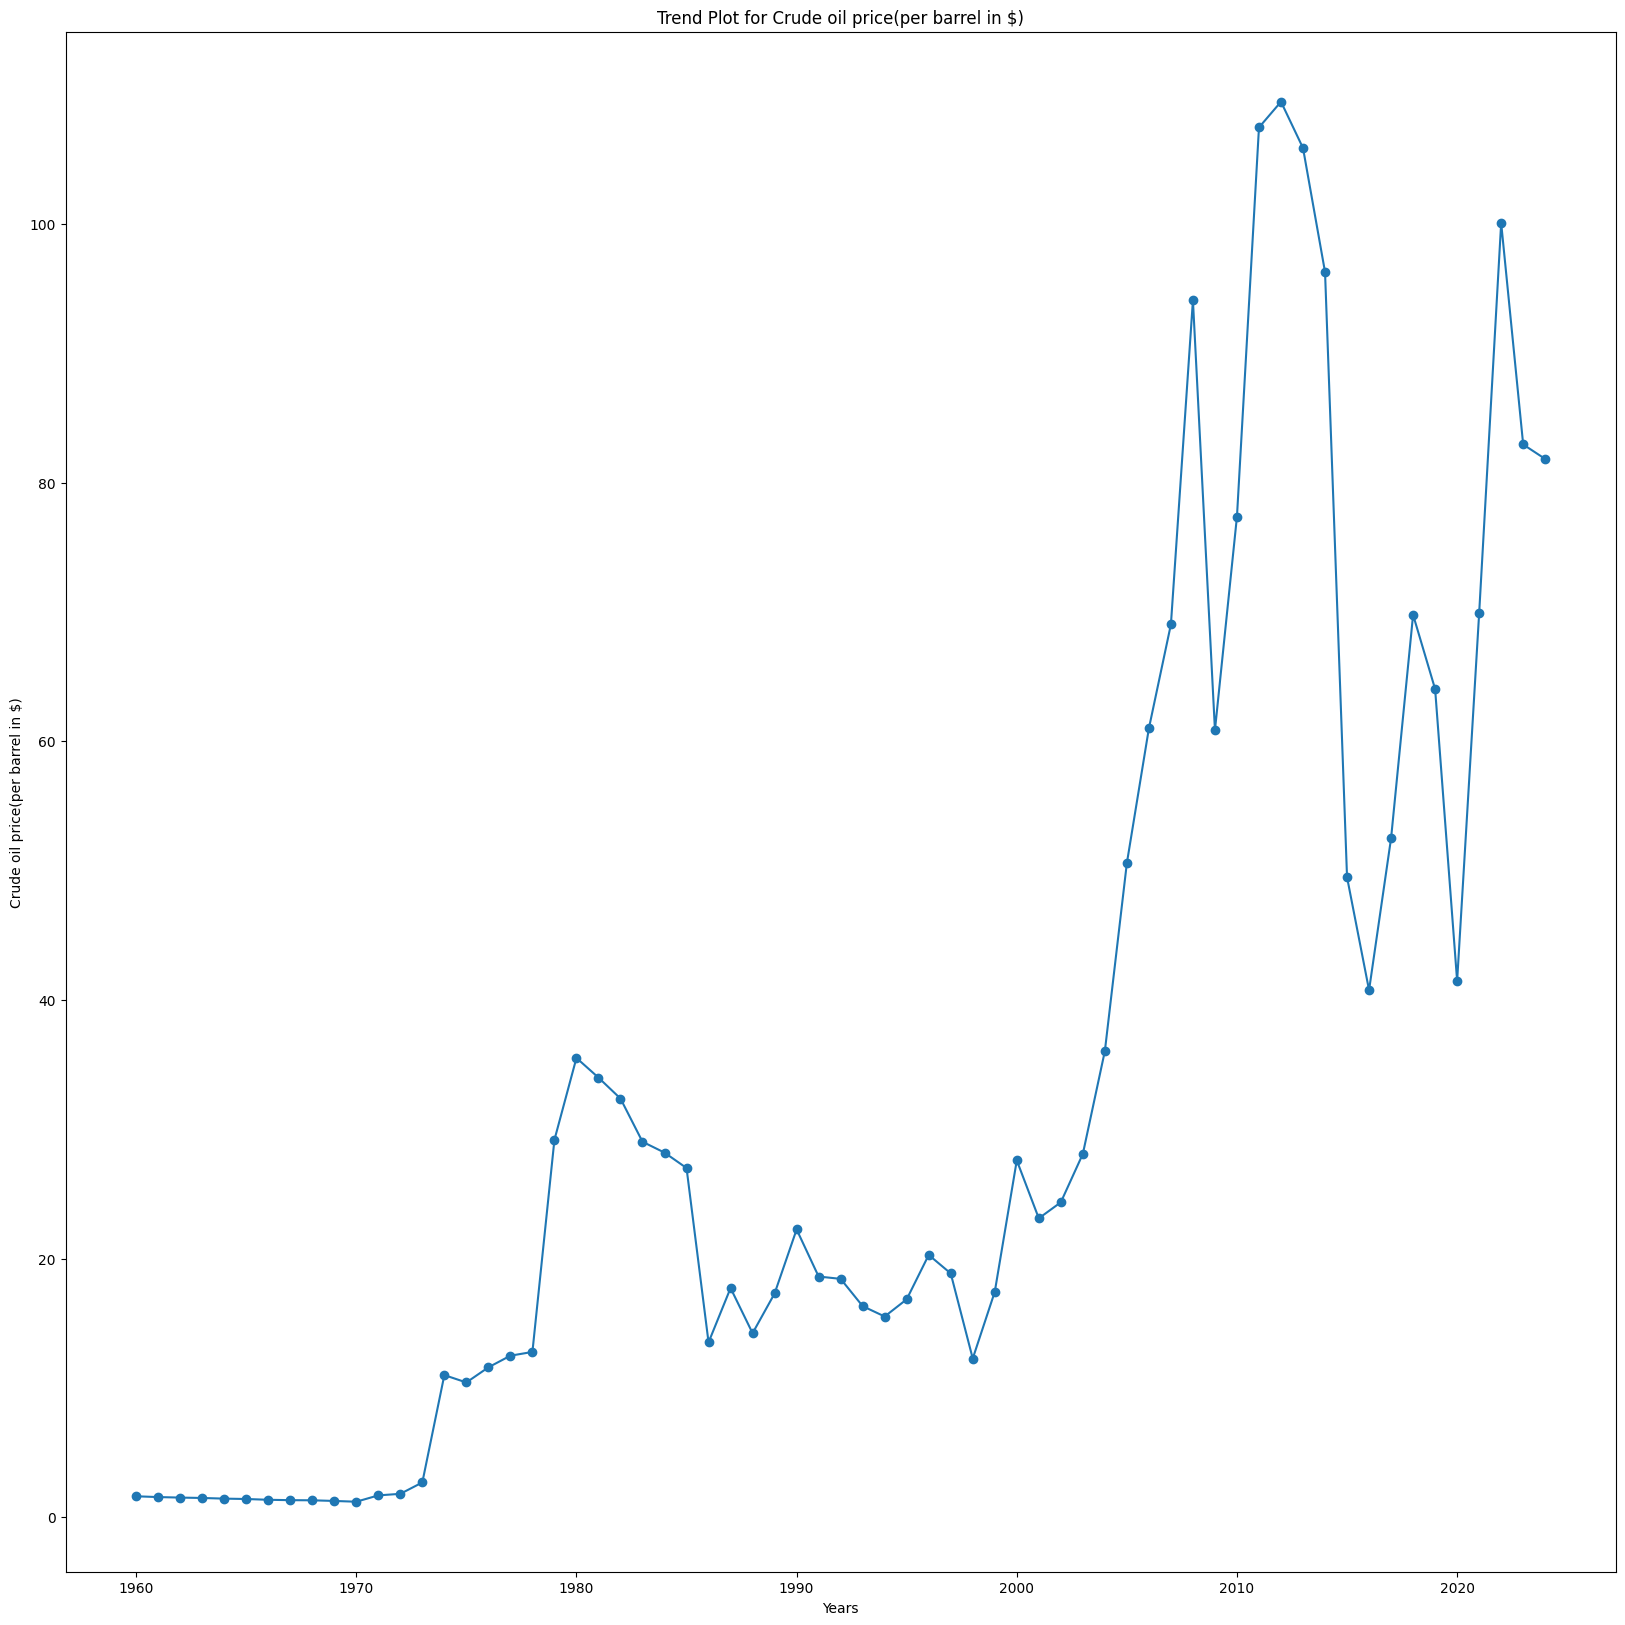

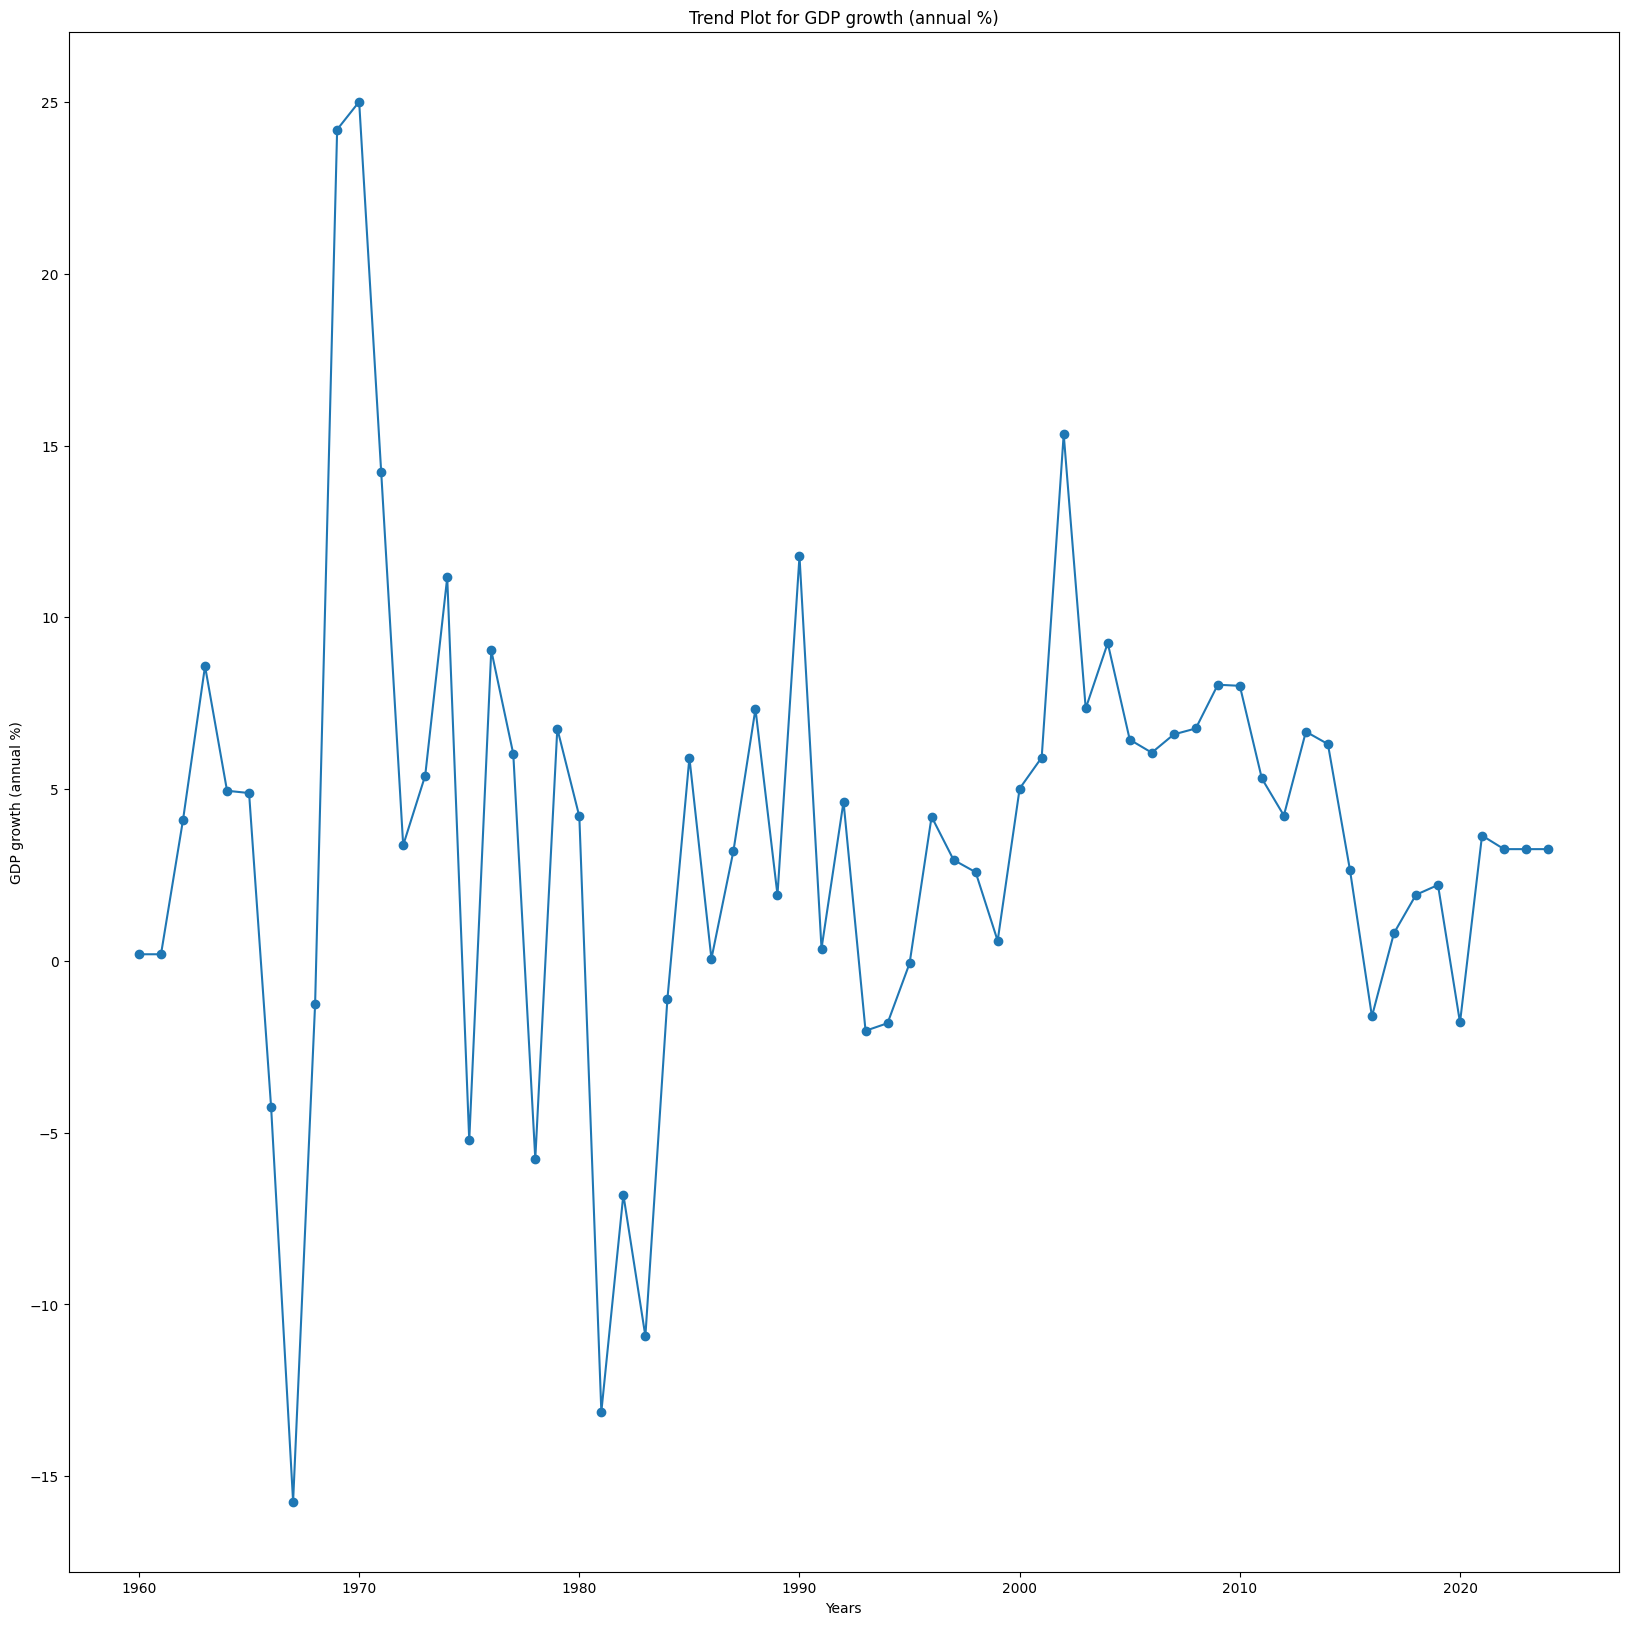

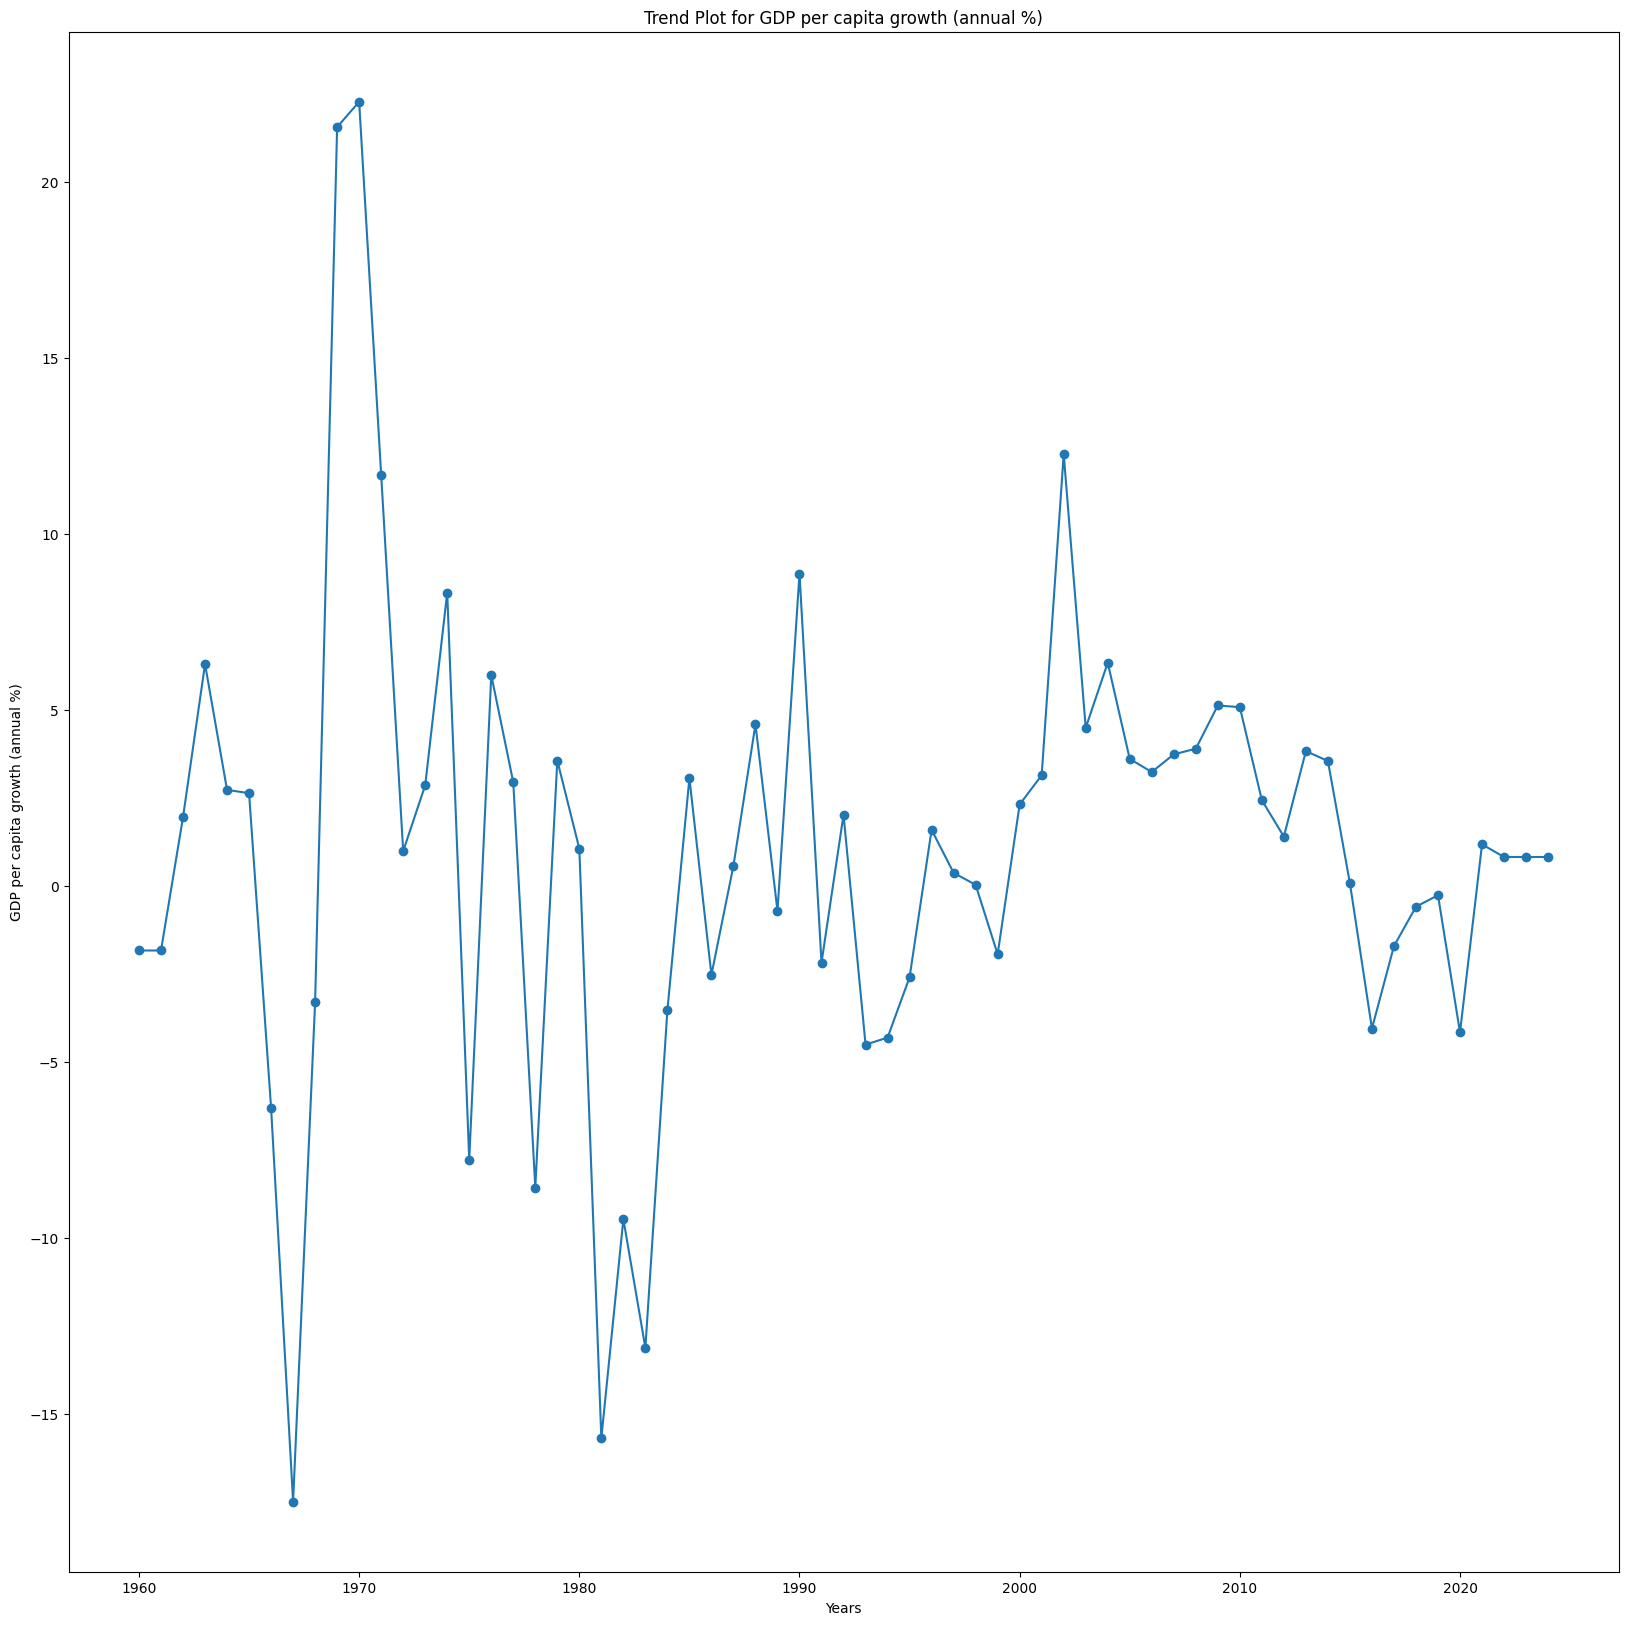

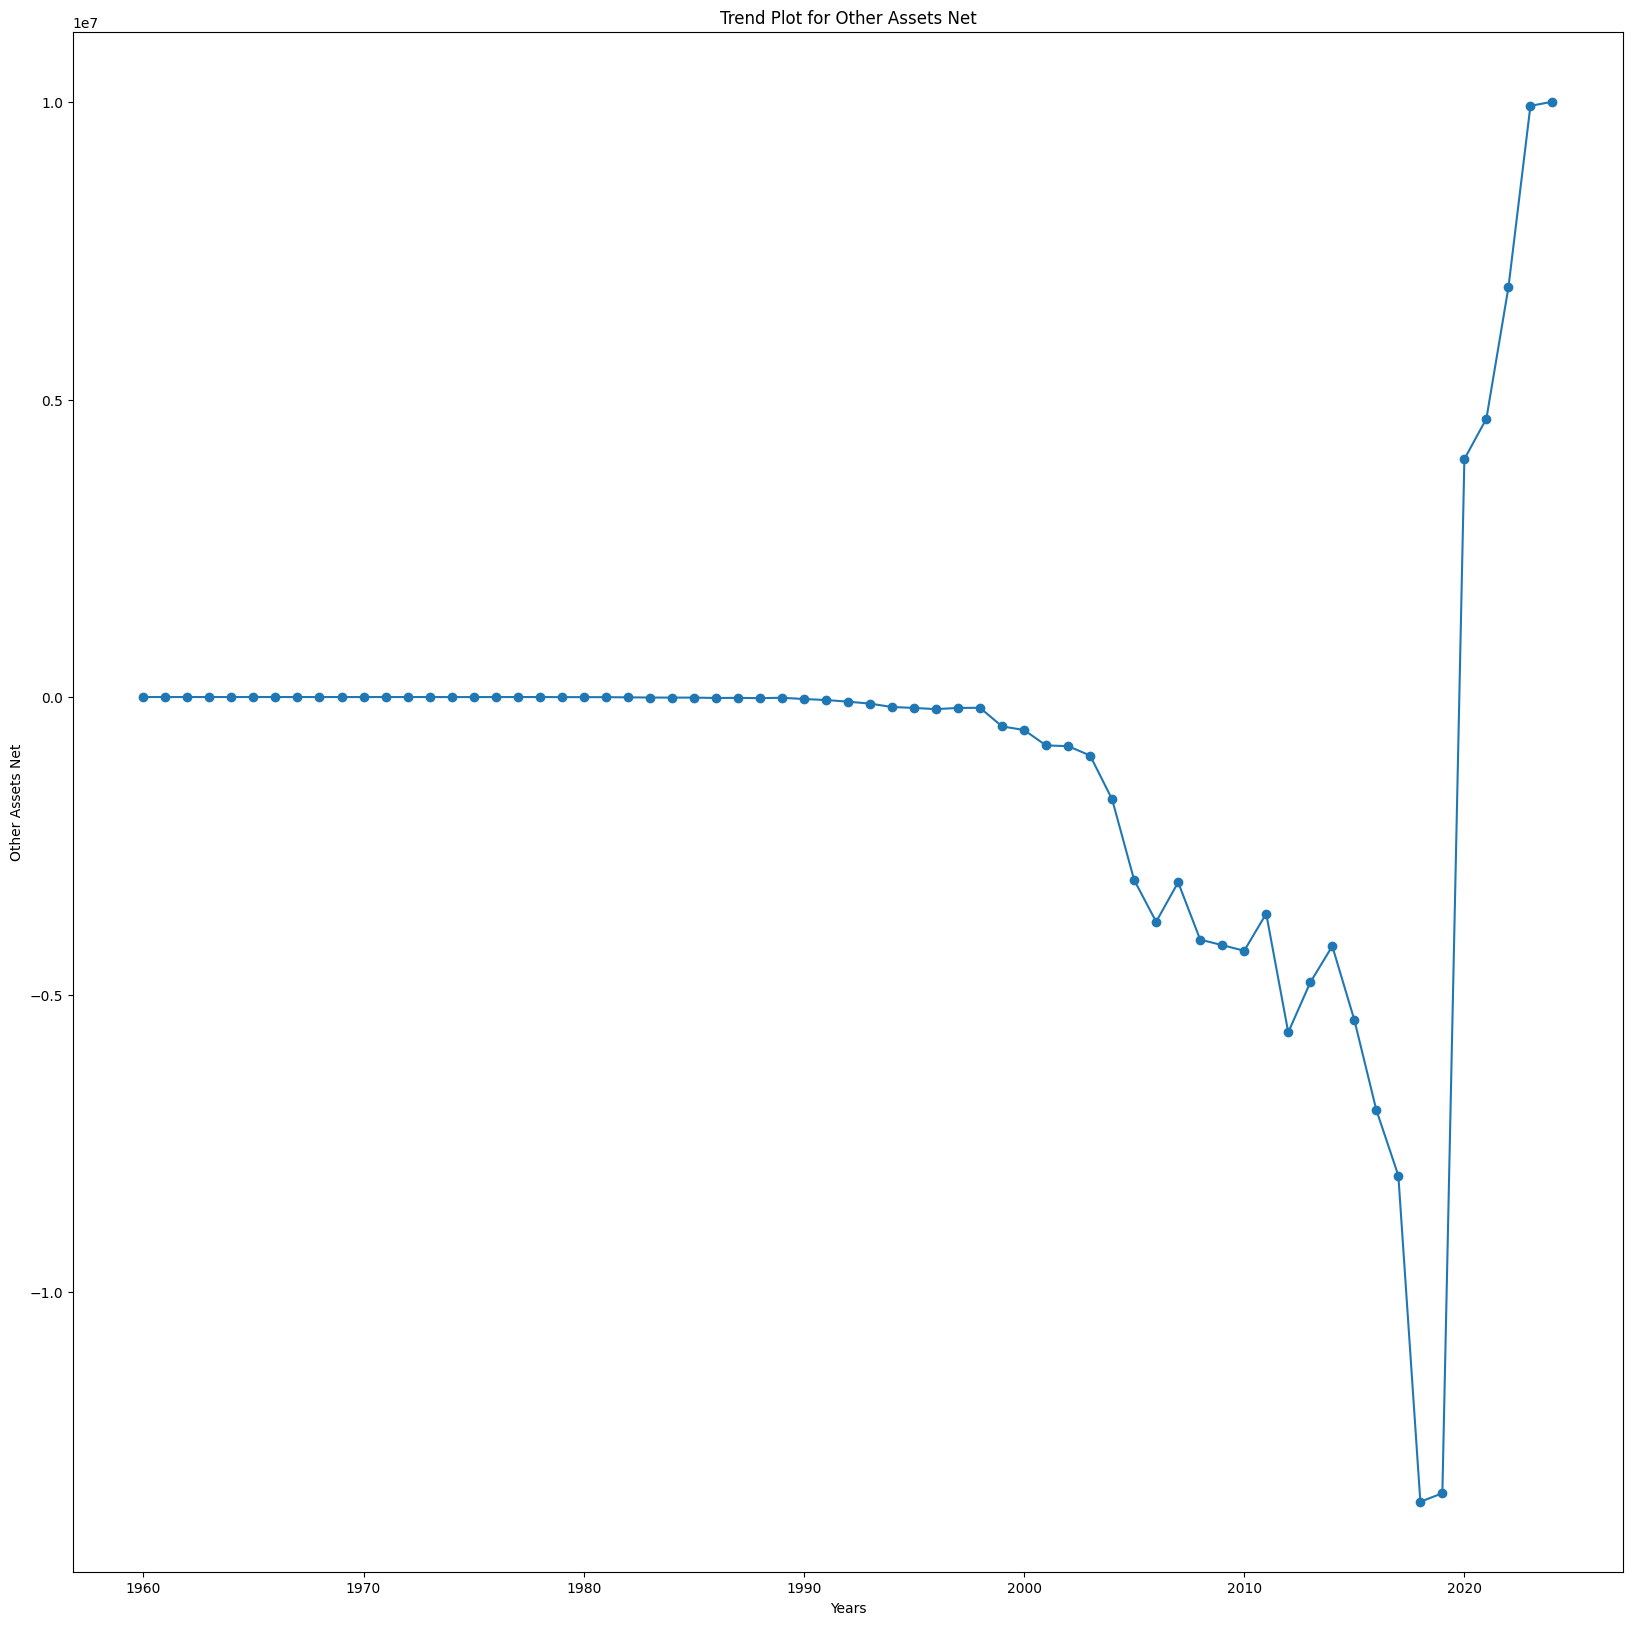

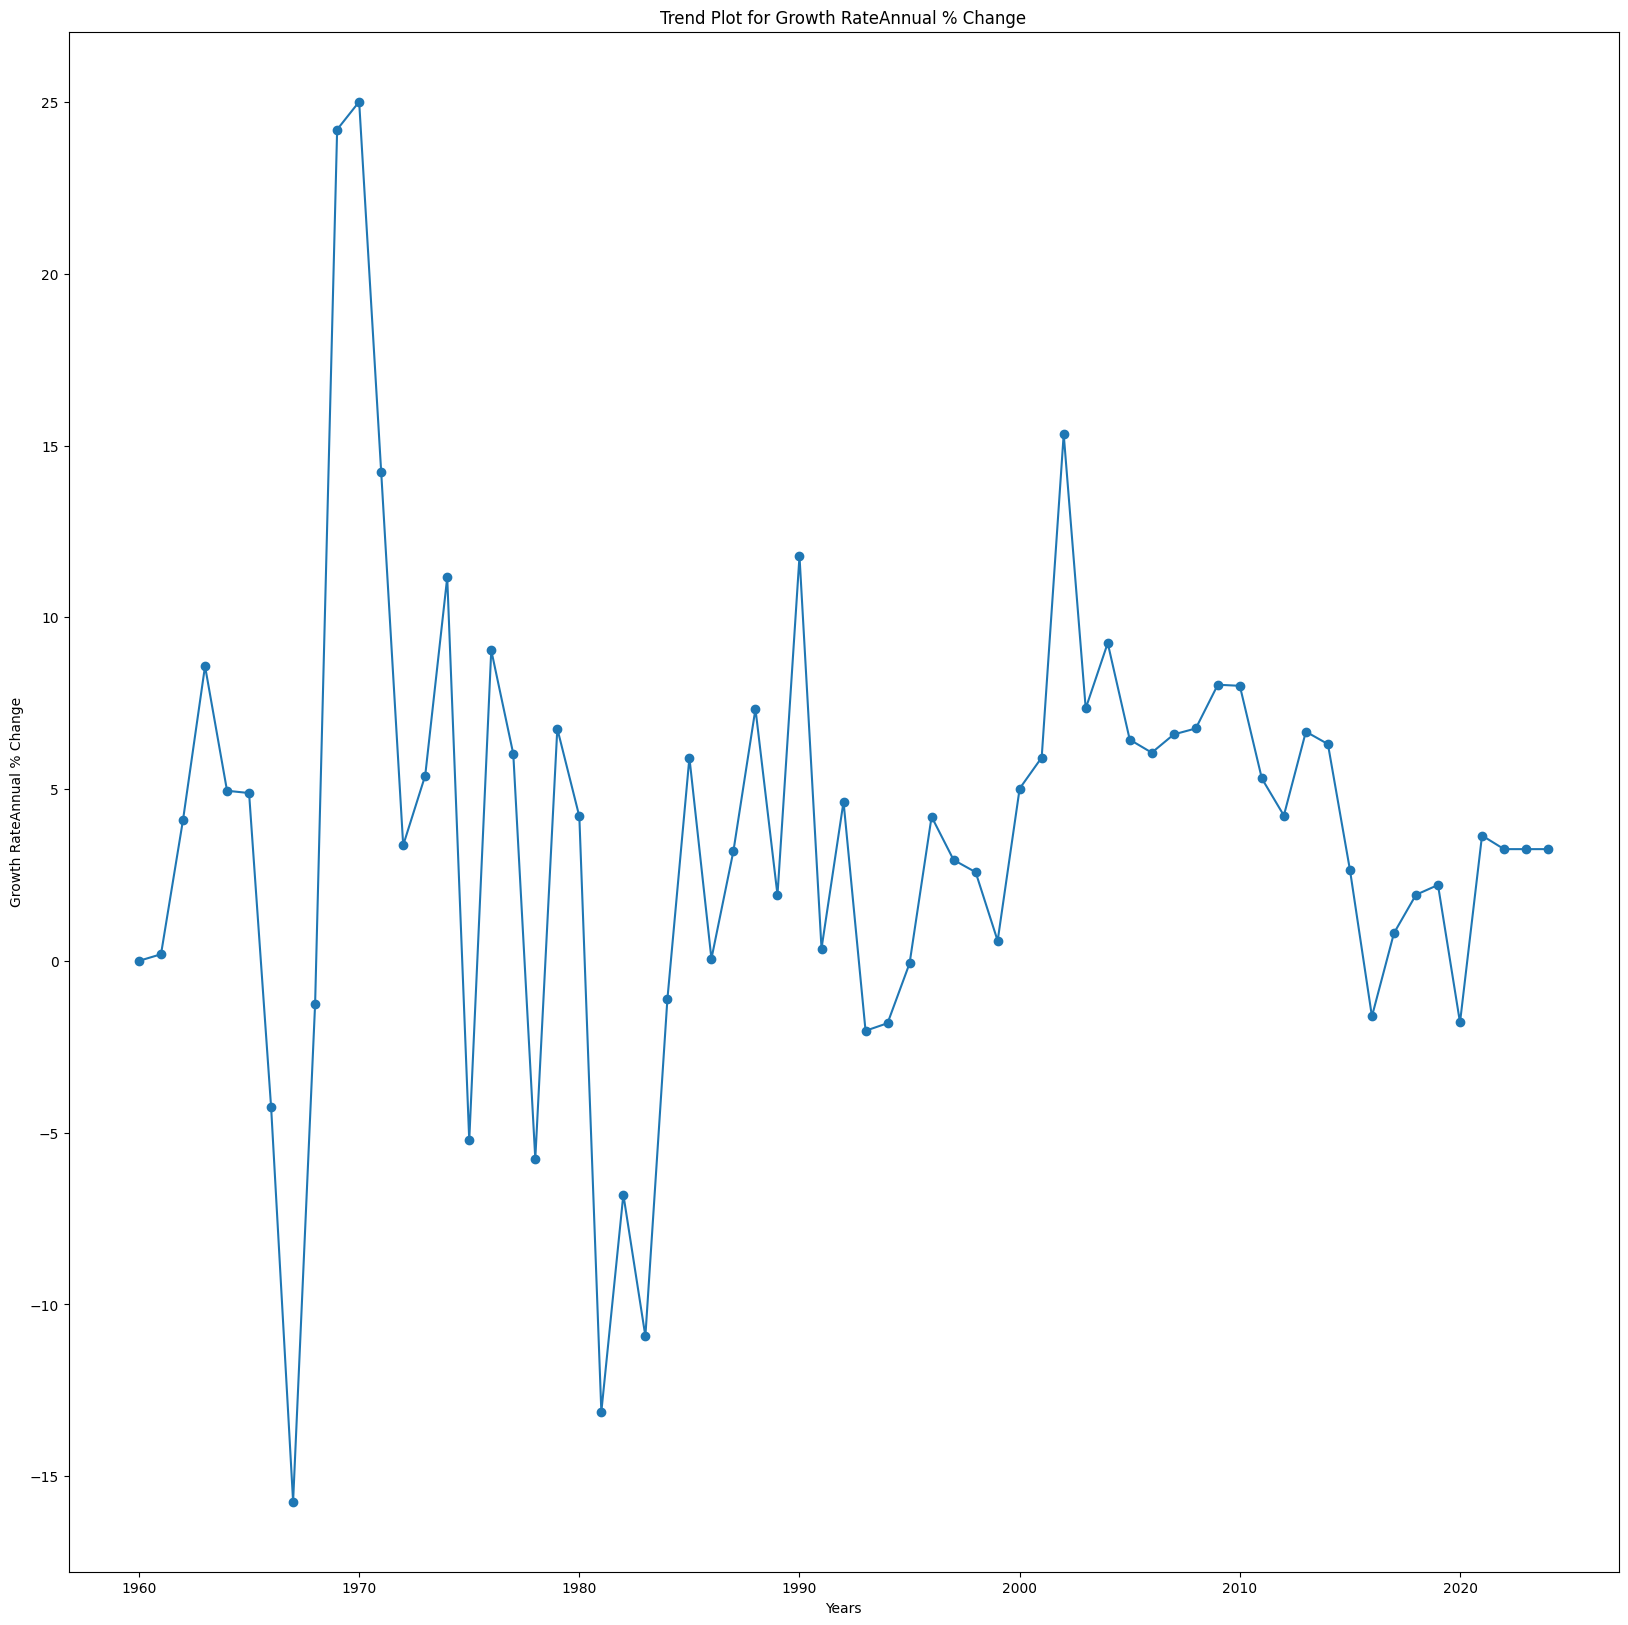

In [12]:
# Loop through each column and create a line plot
selected_cols = sel_table[sel_table.columns]
for column in selected_cols.columns:
    plt.figure(figsize=(20, 20))
    plt.plot(data['Year'],data[column], marker='o', linestyle='-')
    plt.title(f'Trend Plot for {column}')
    plt.xlabel('Years')
    plt.ylabel(column)
    plt.show()

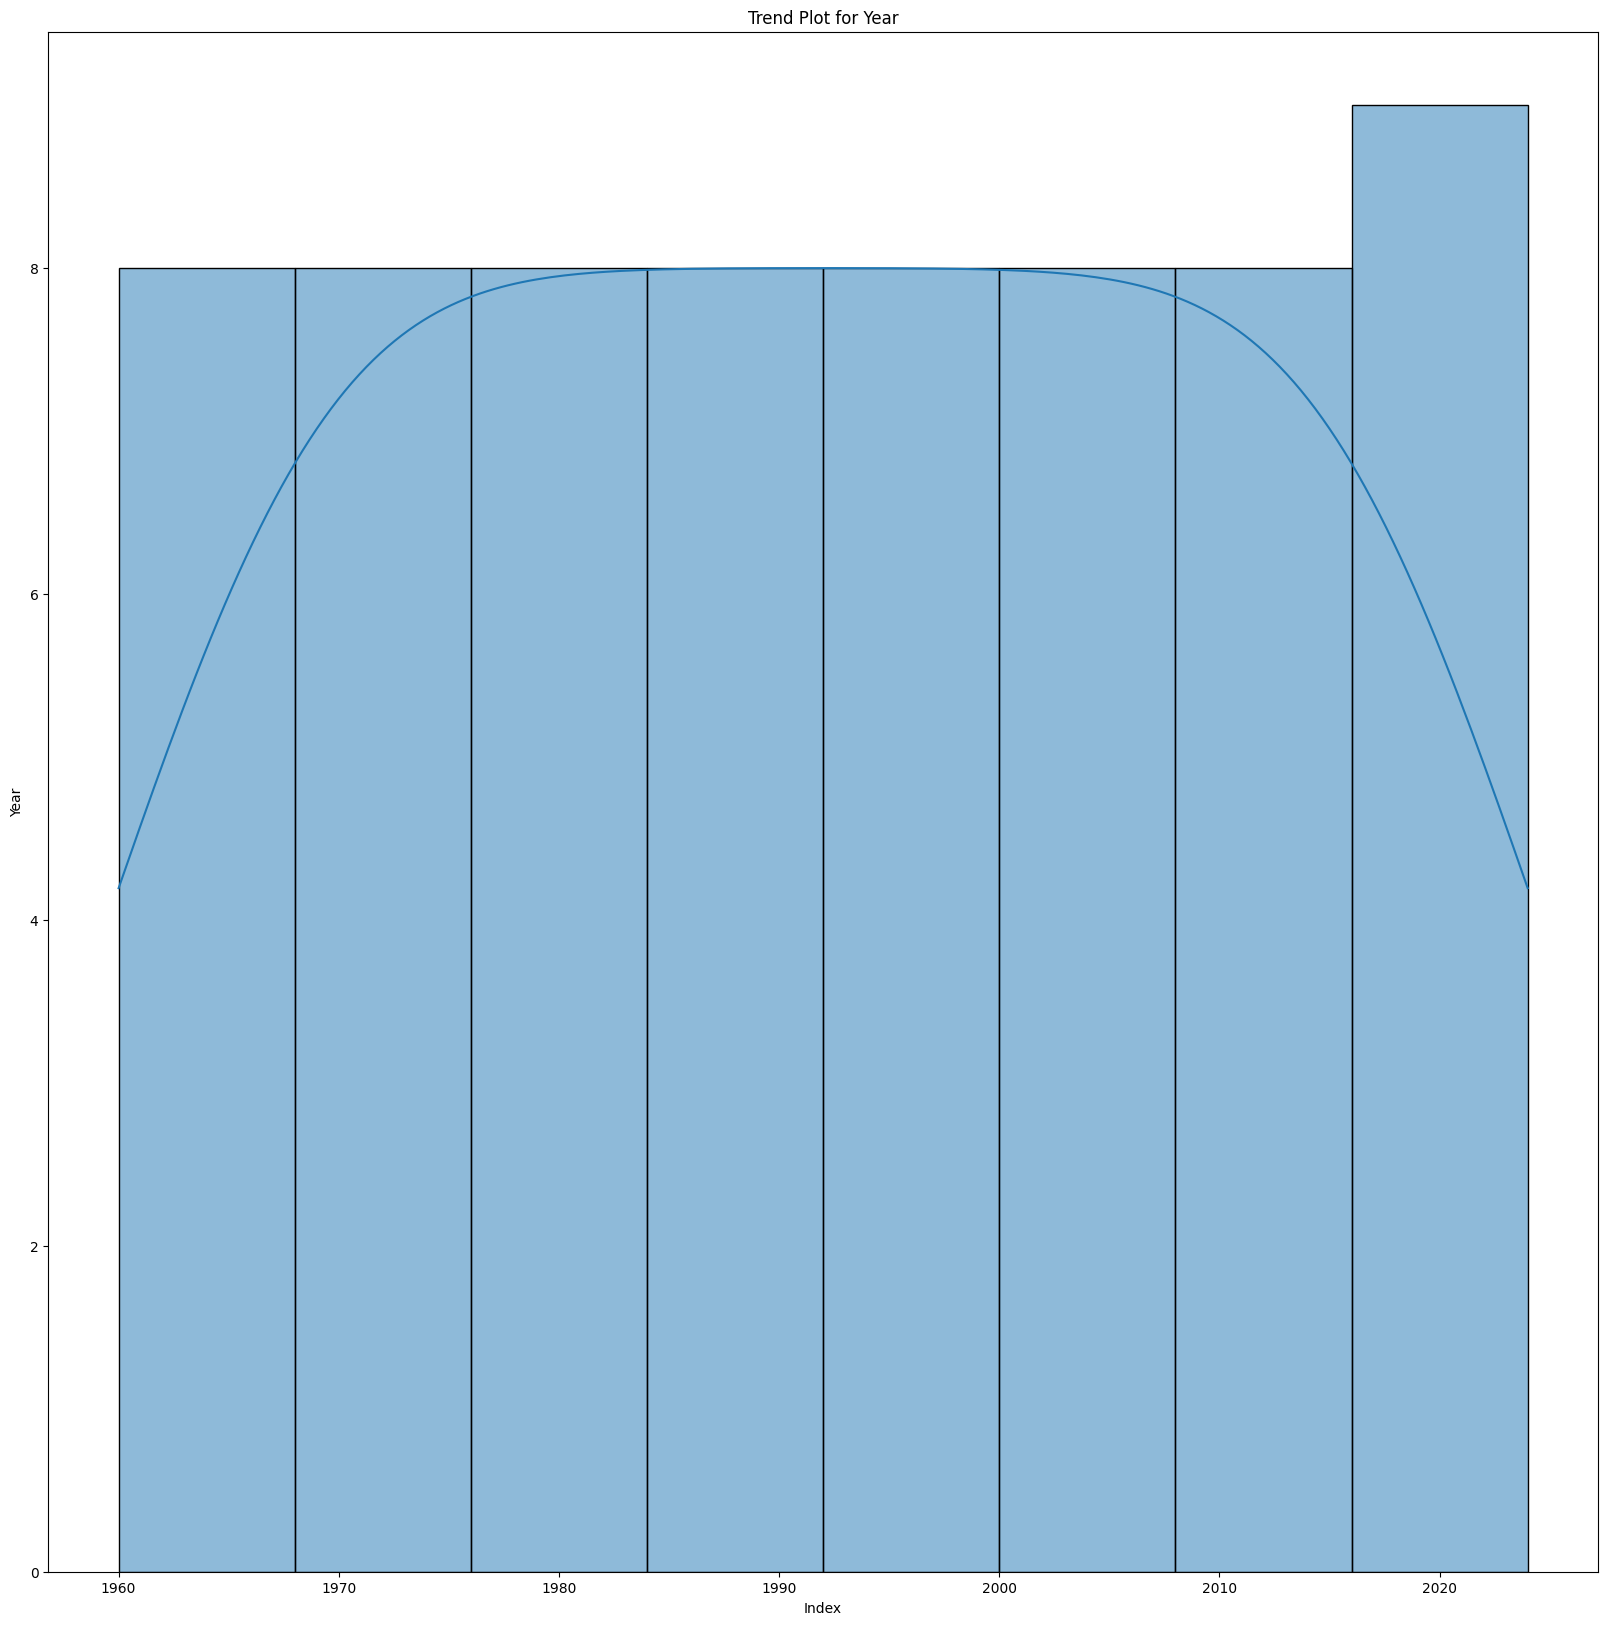

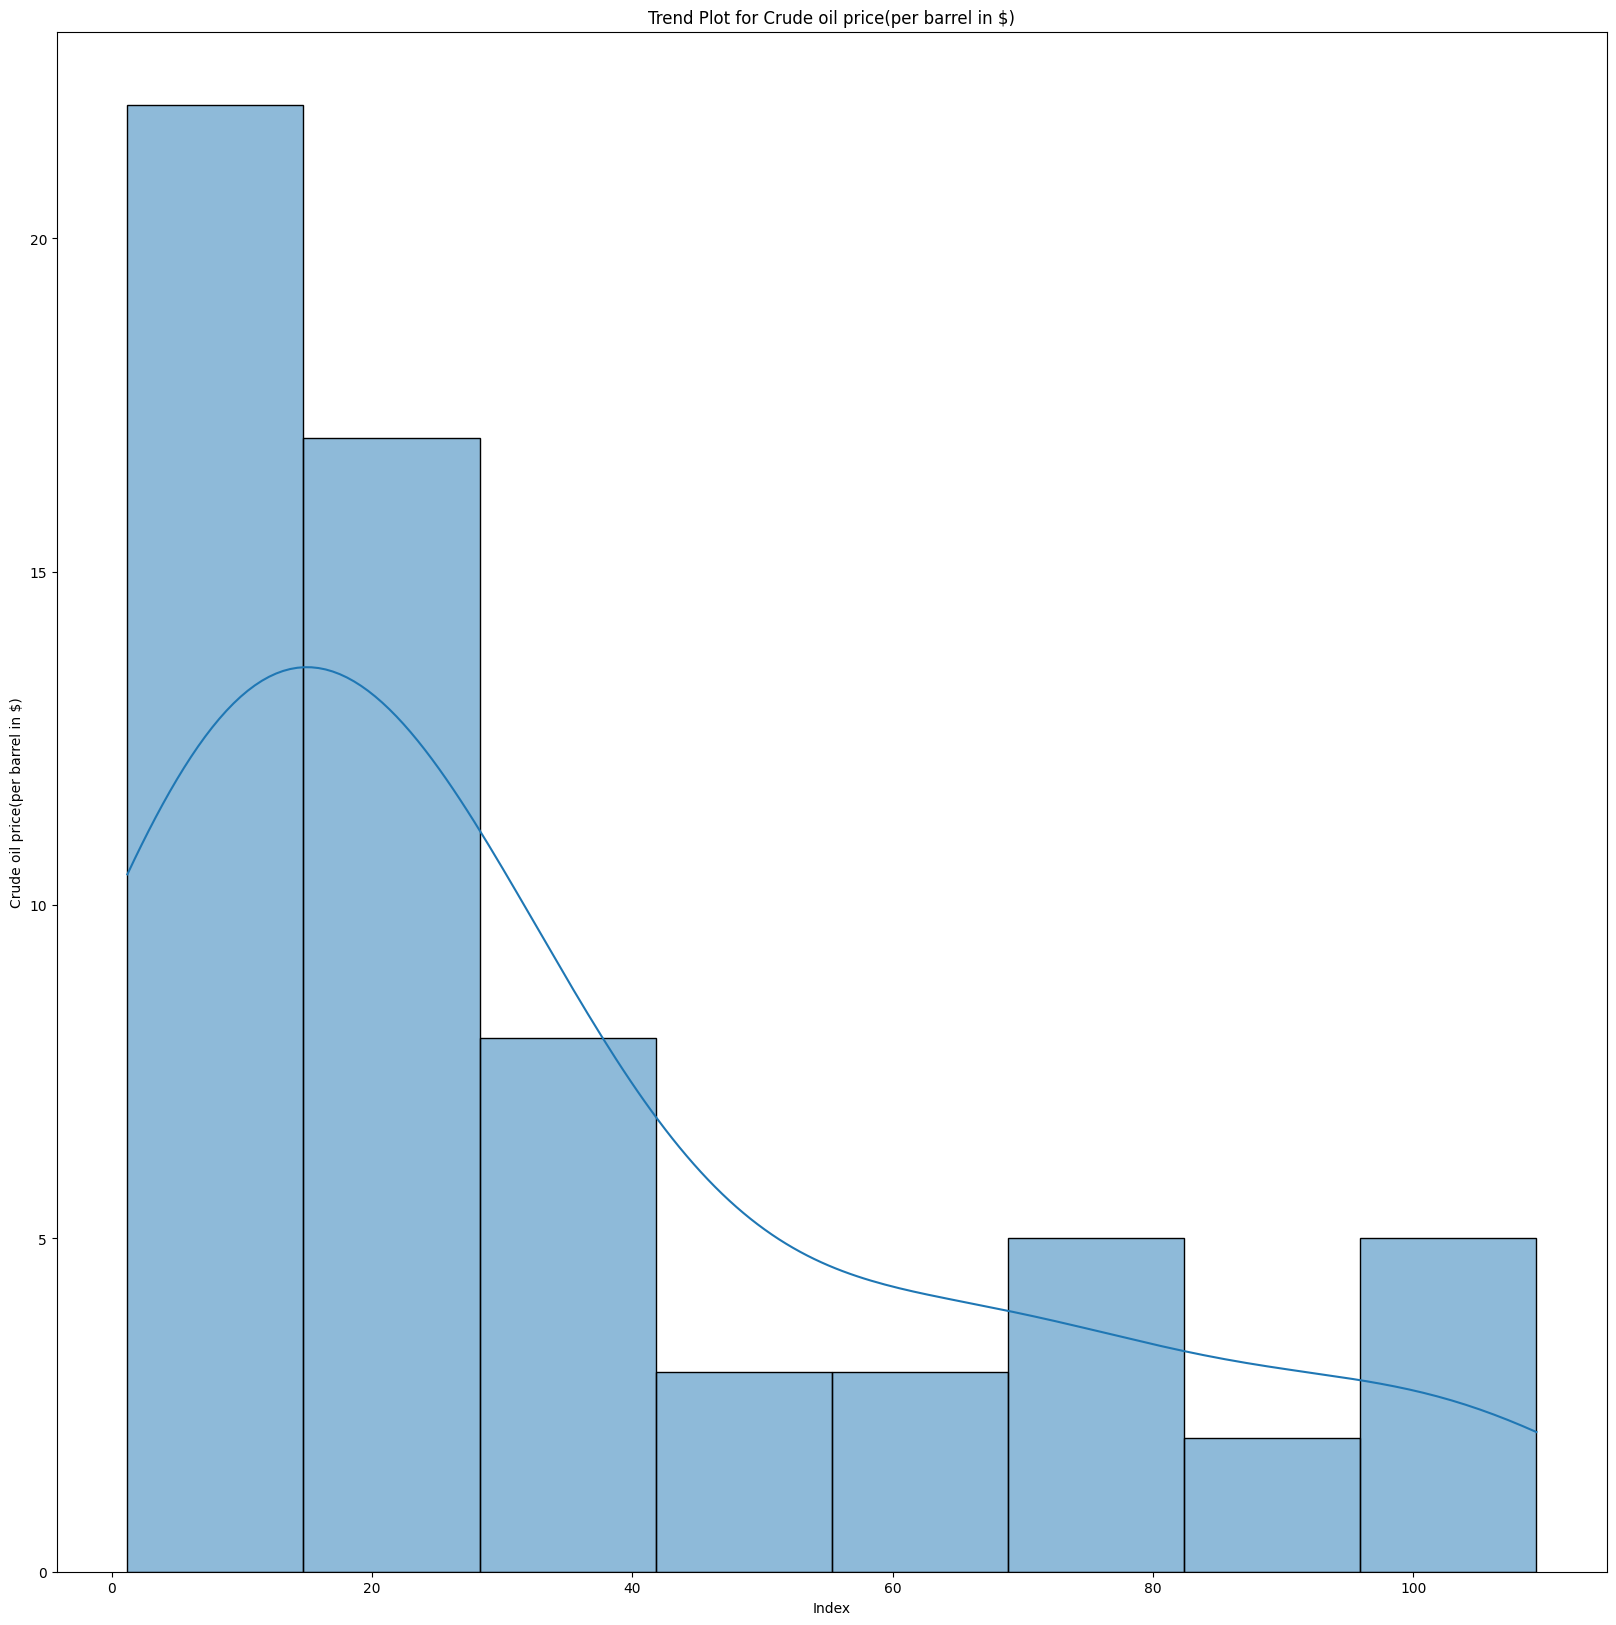

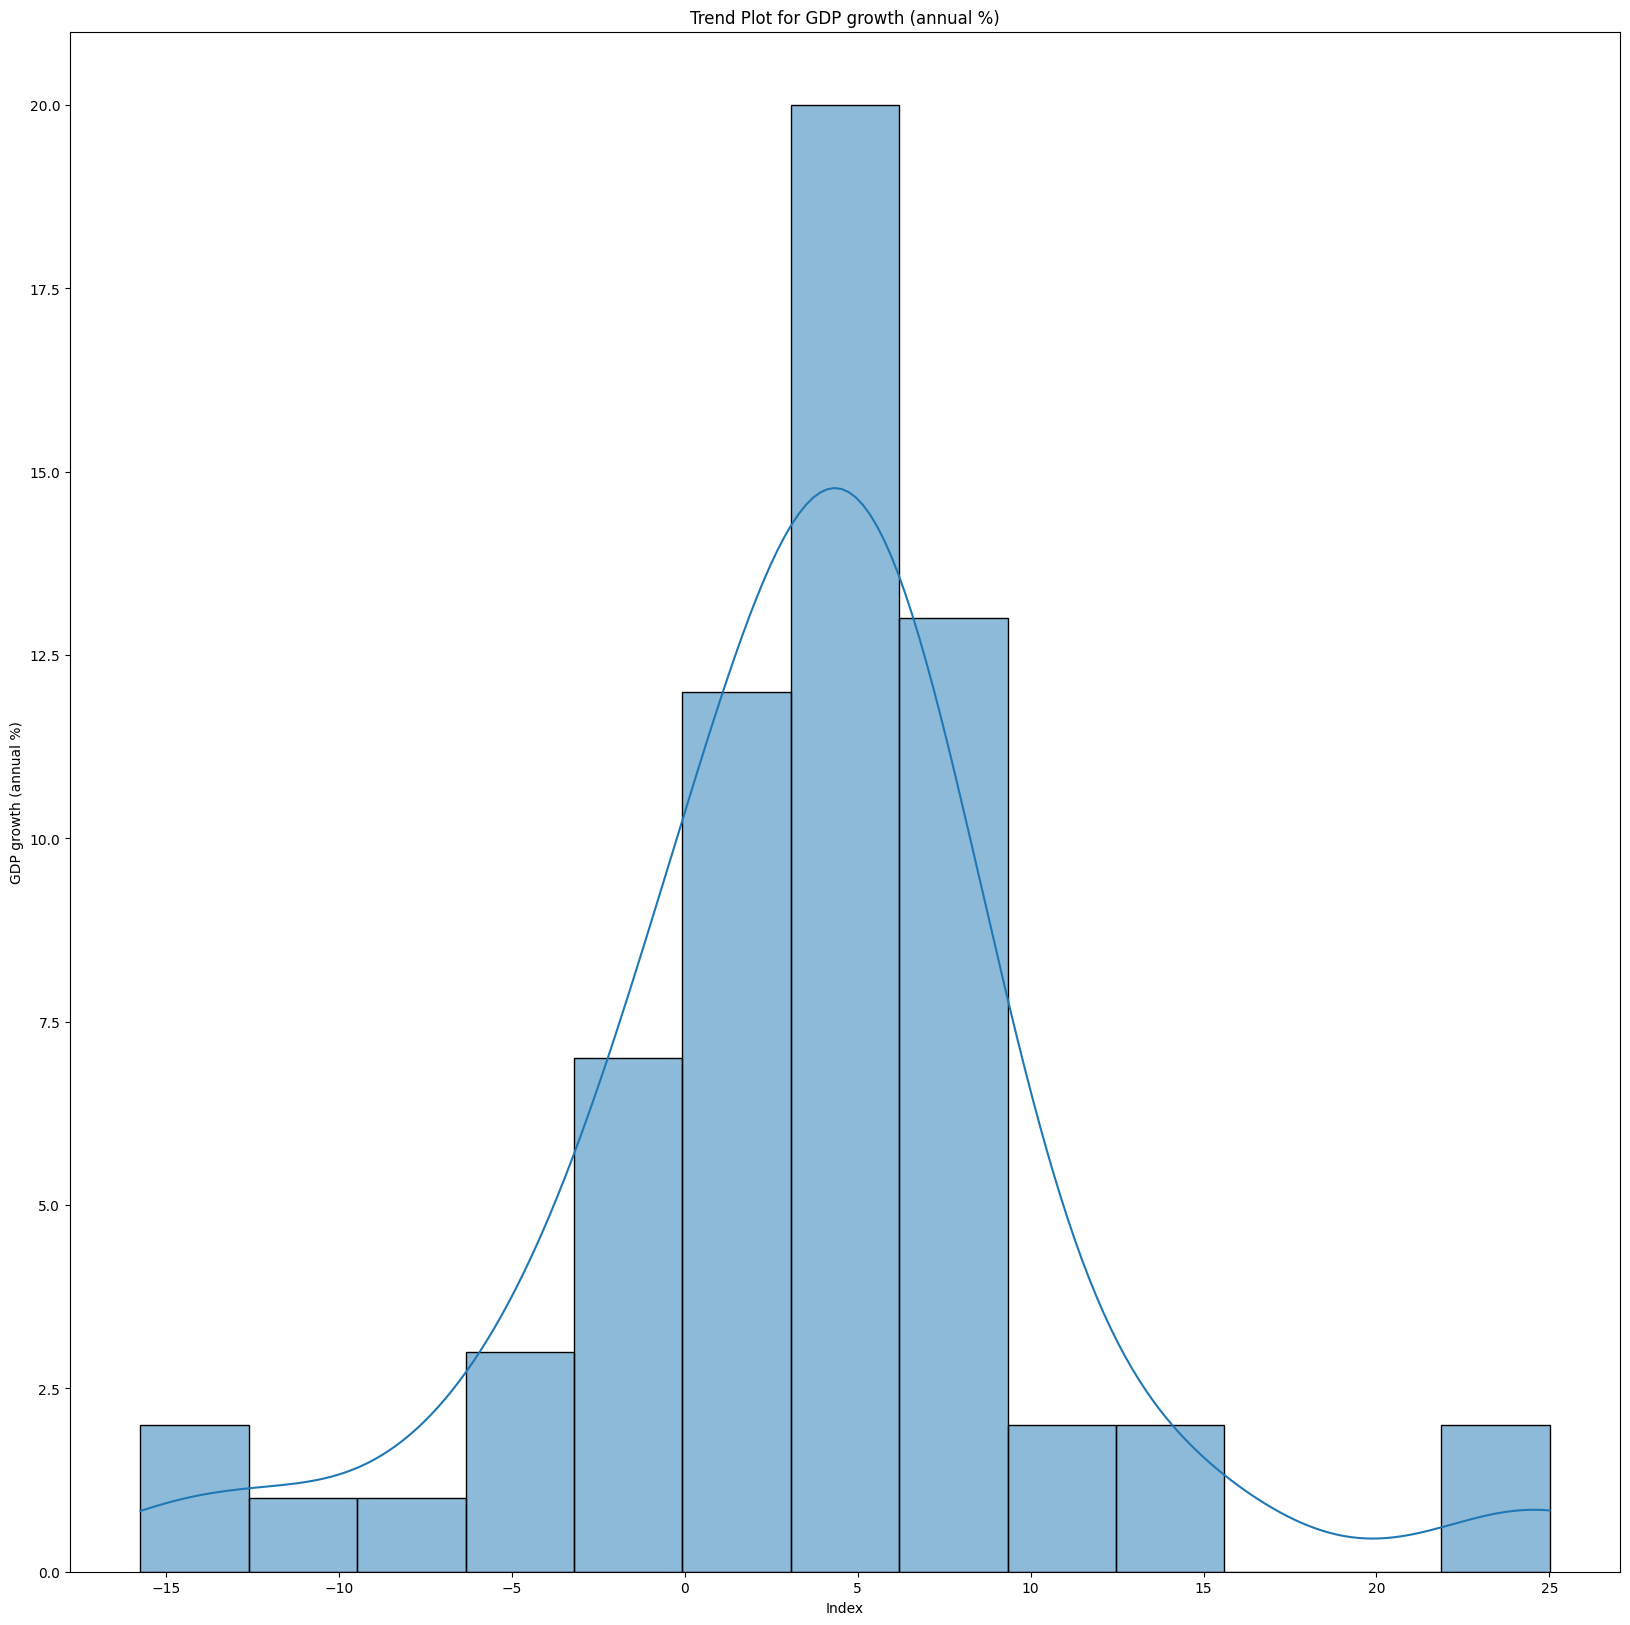

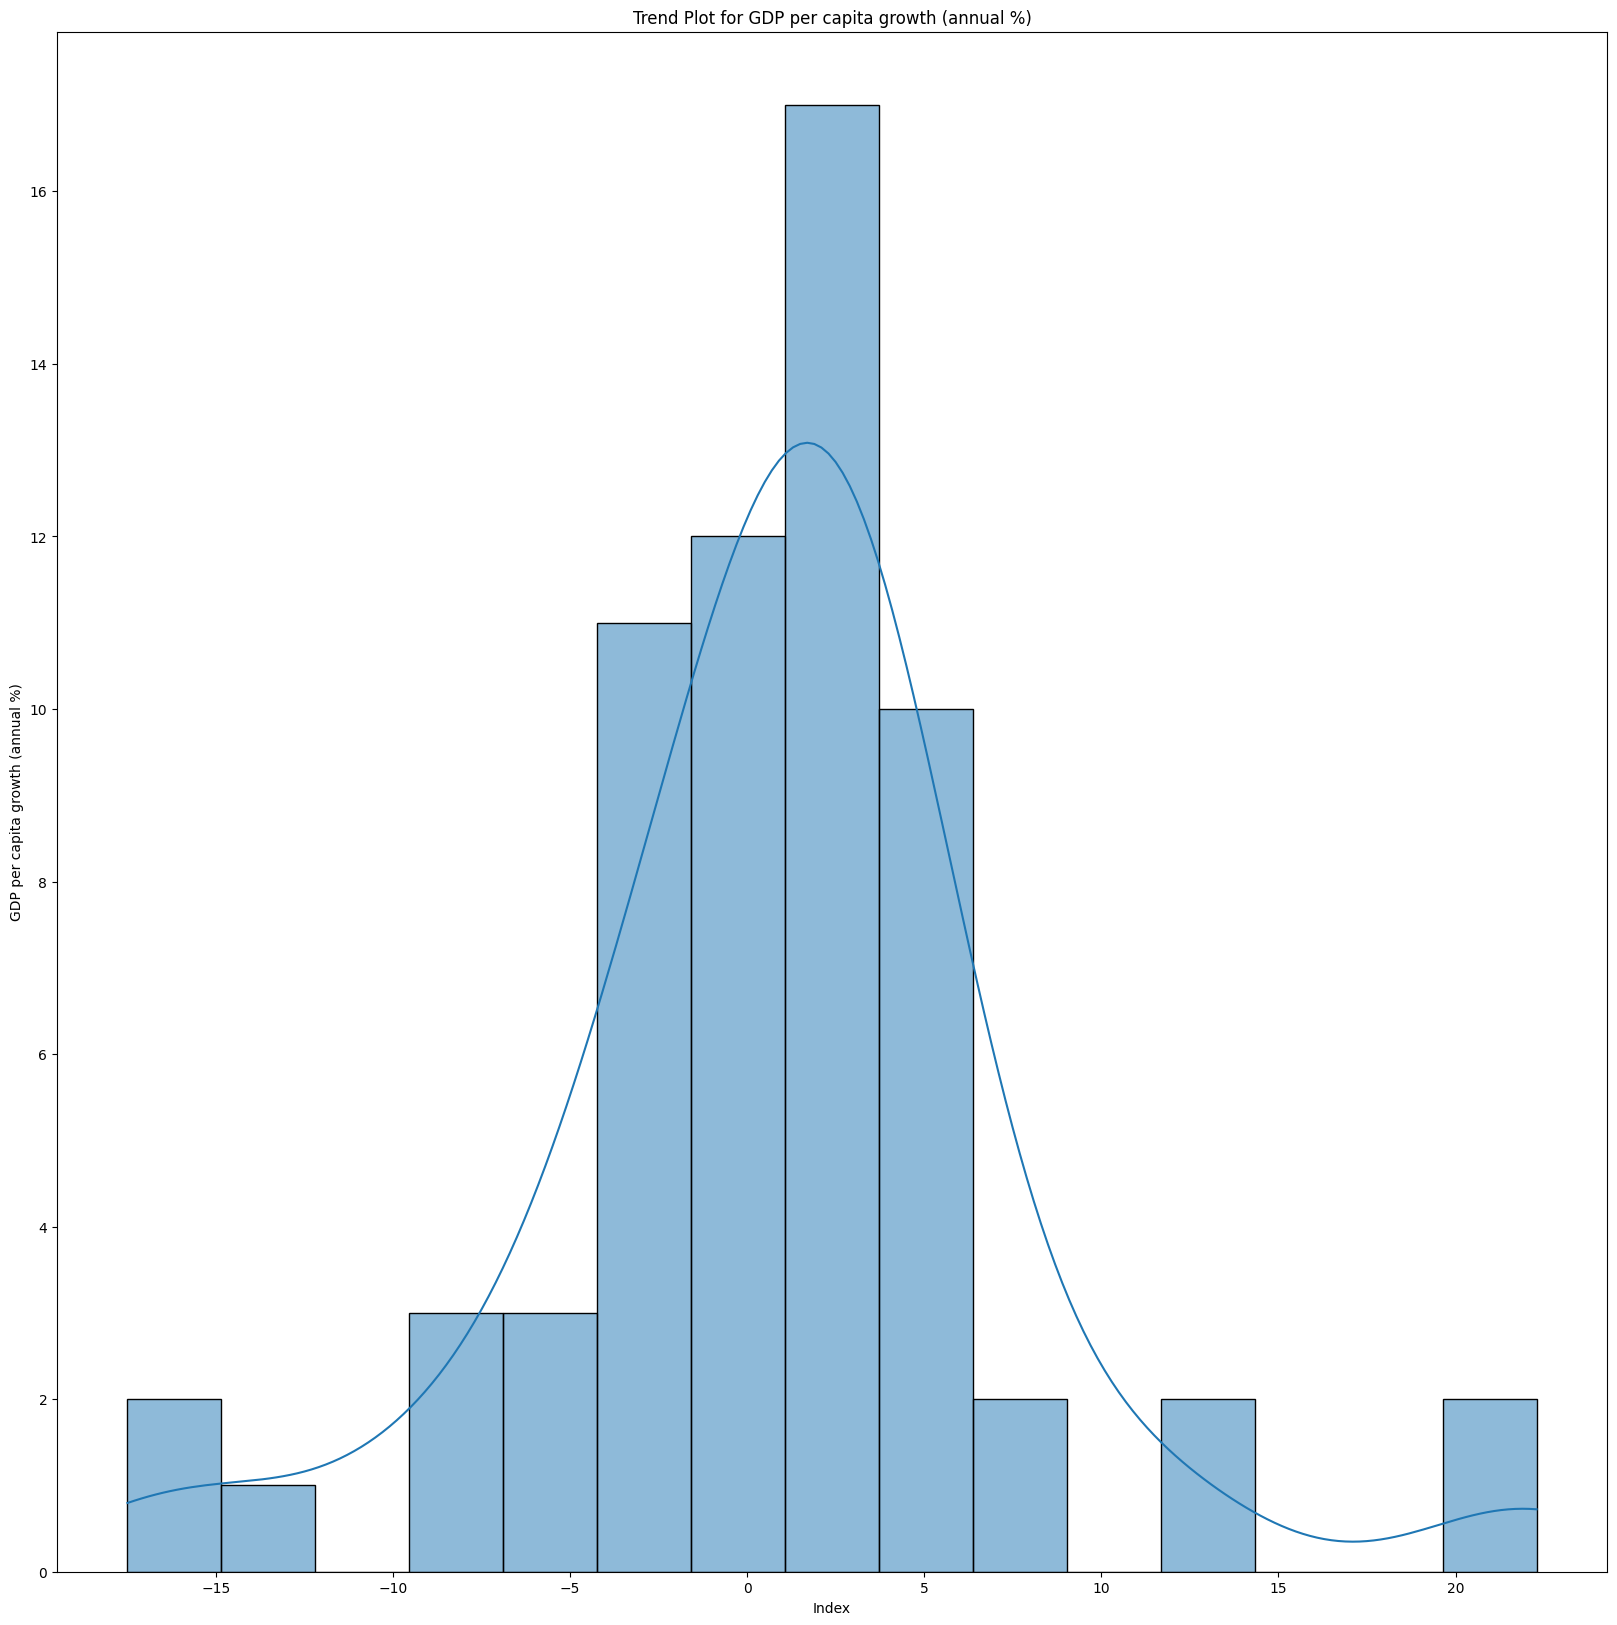

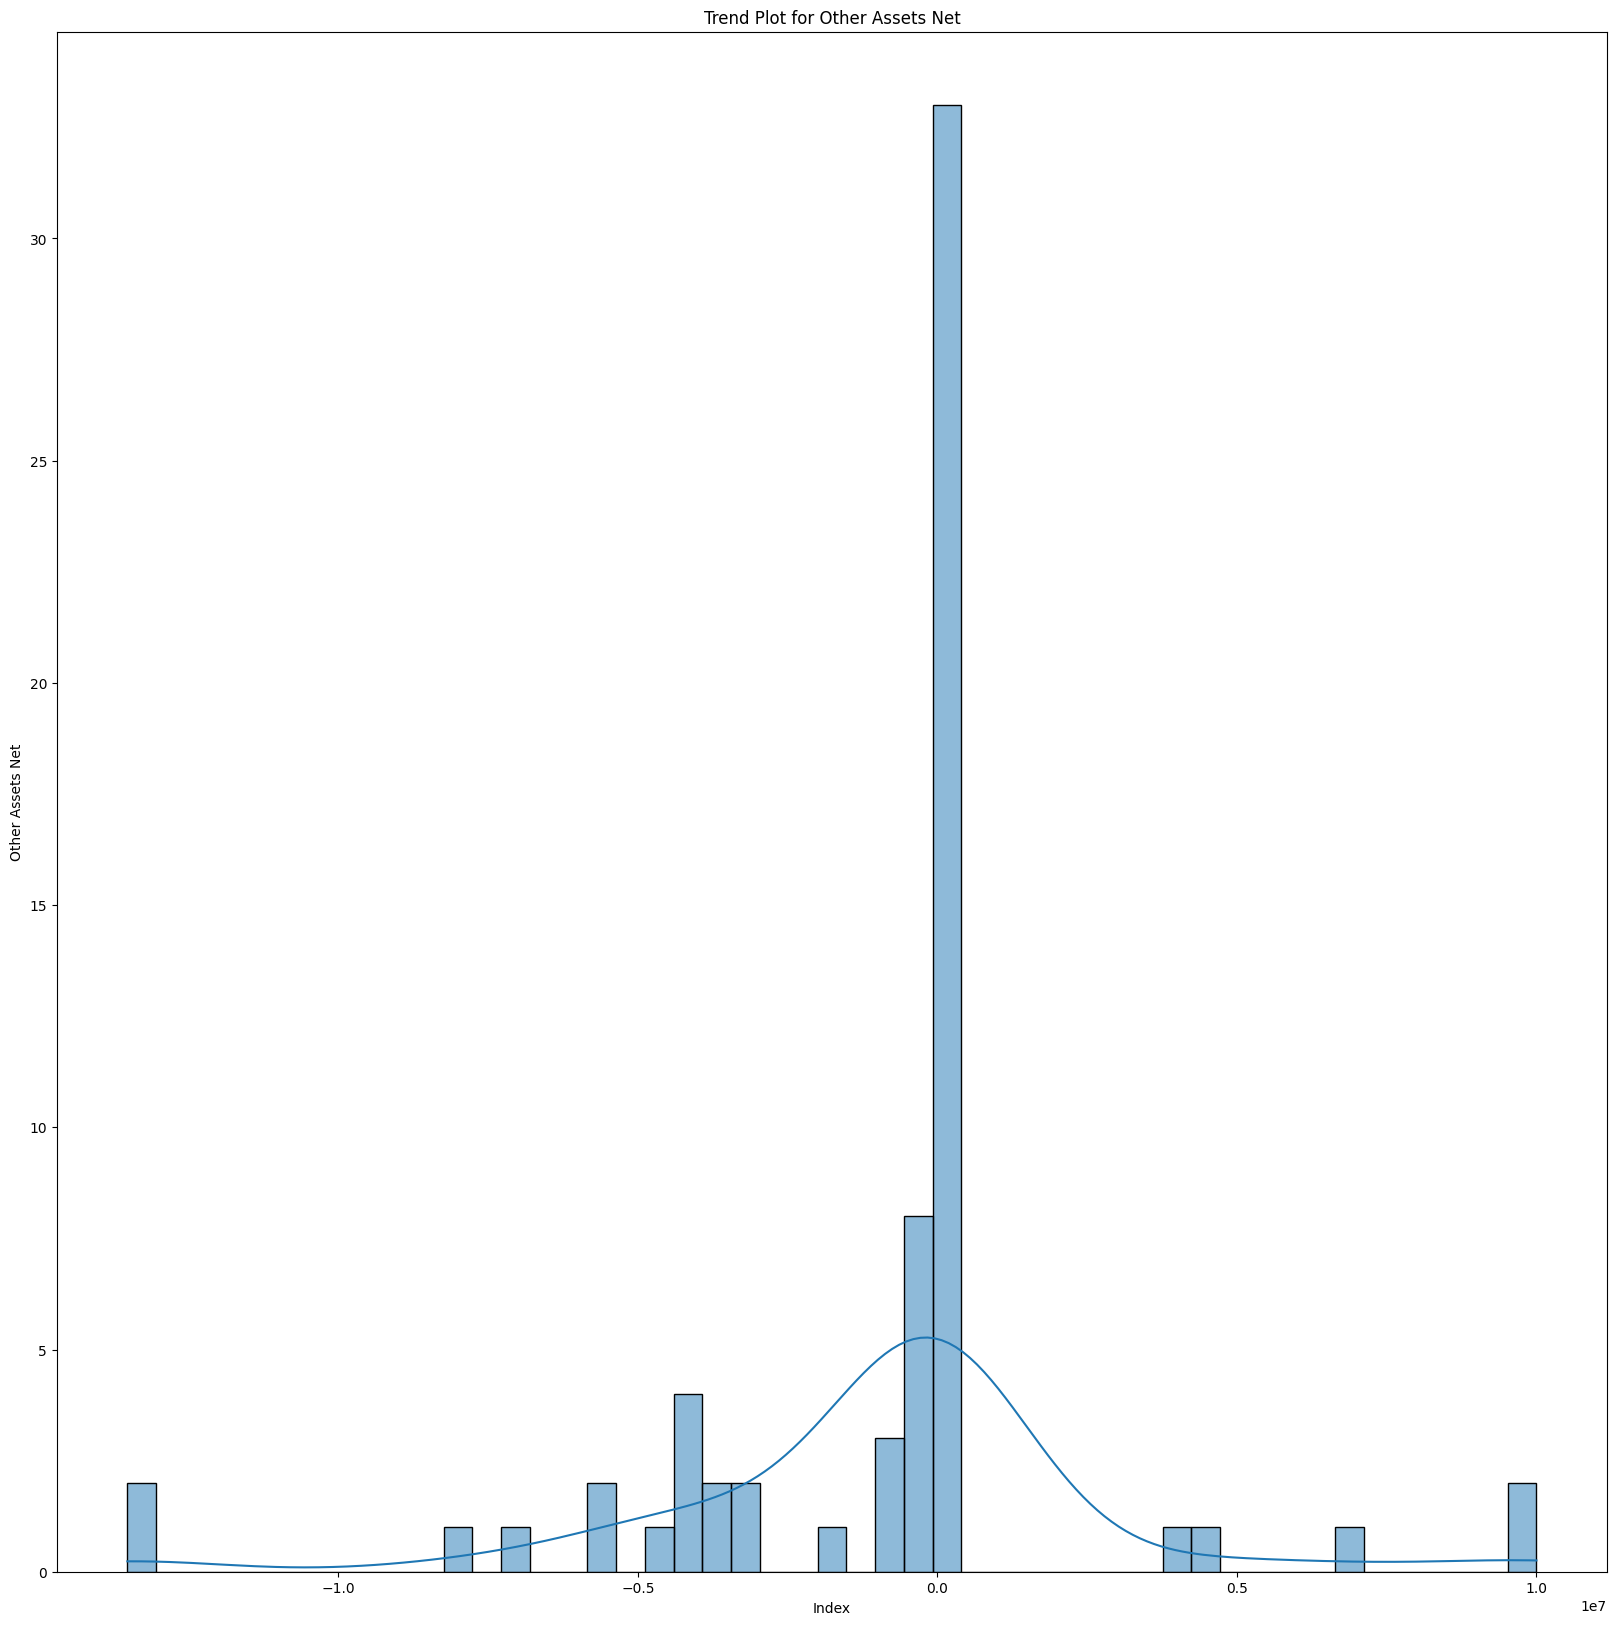

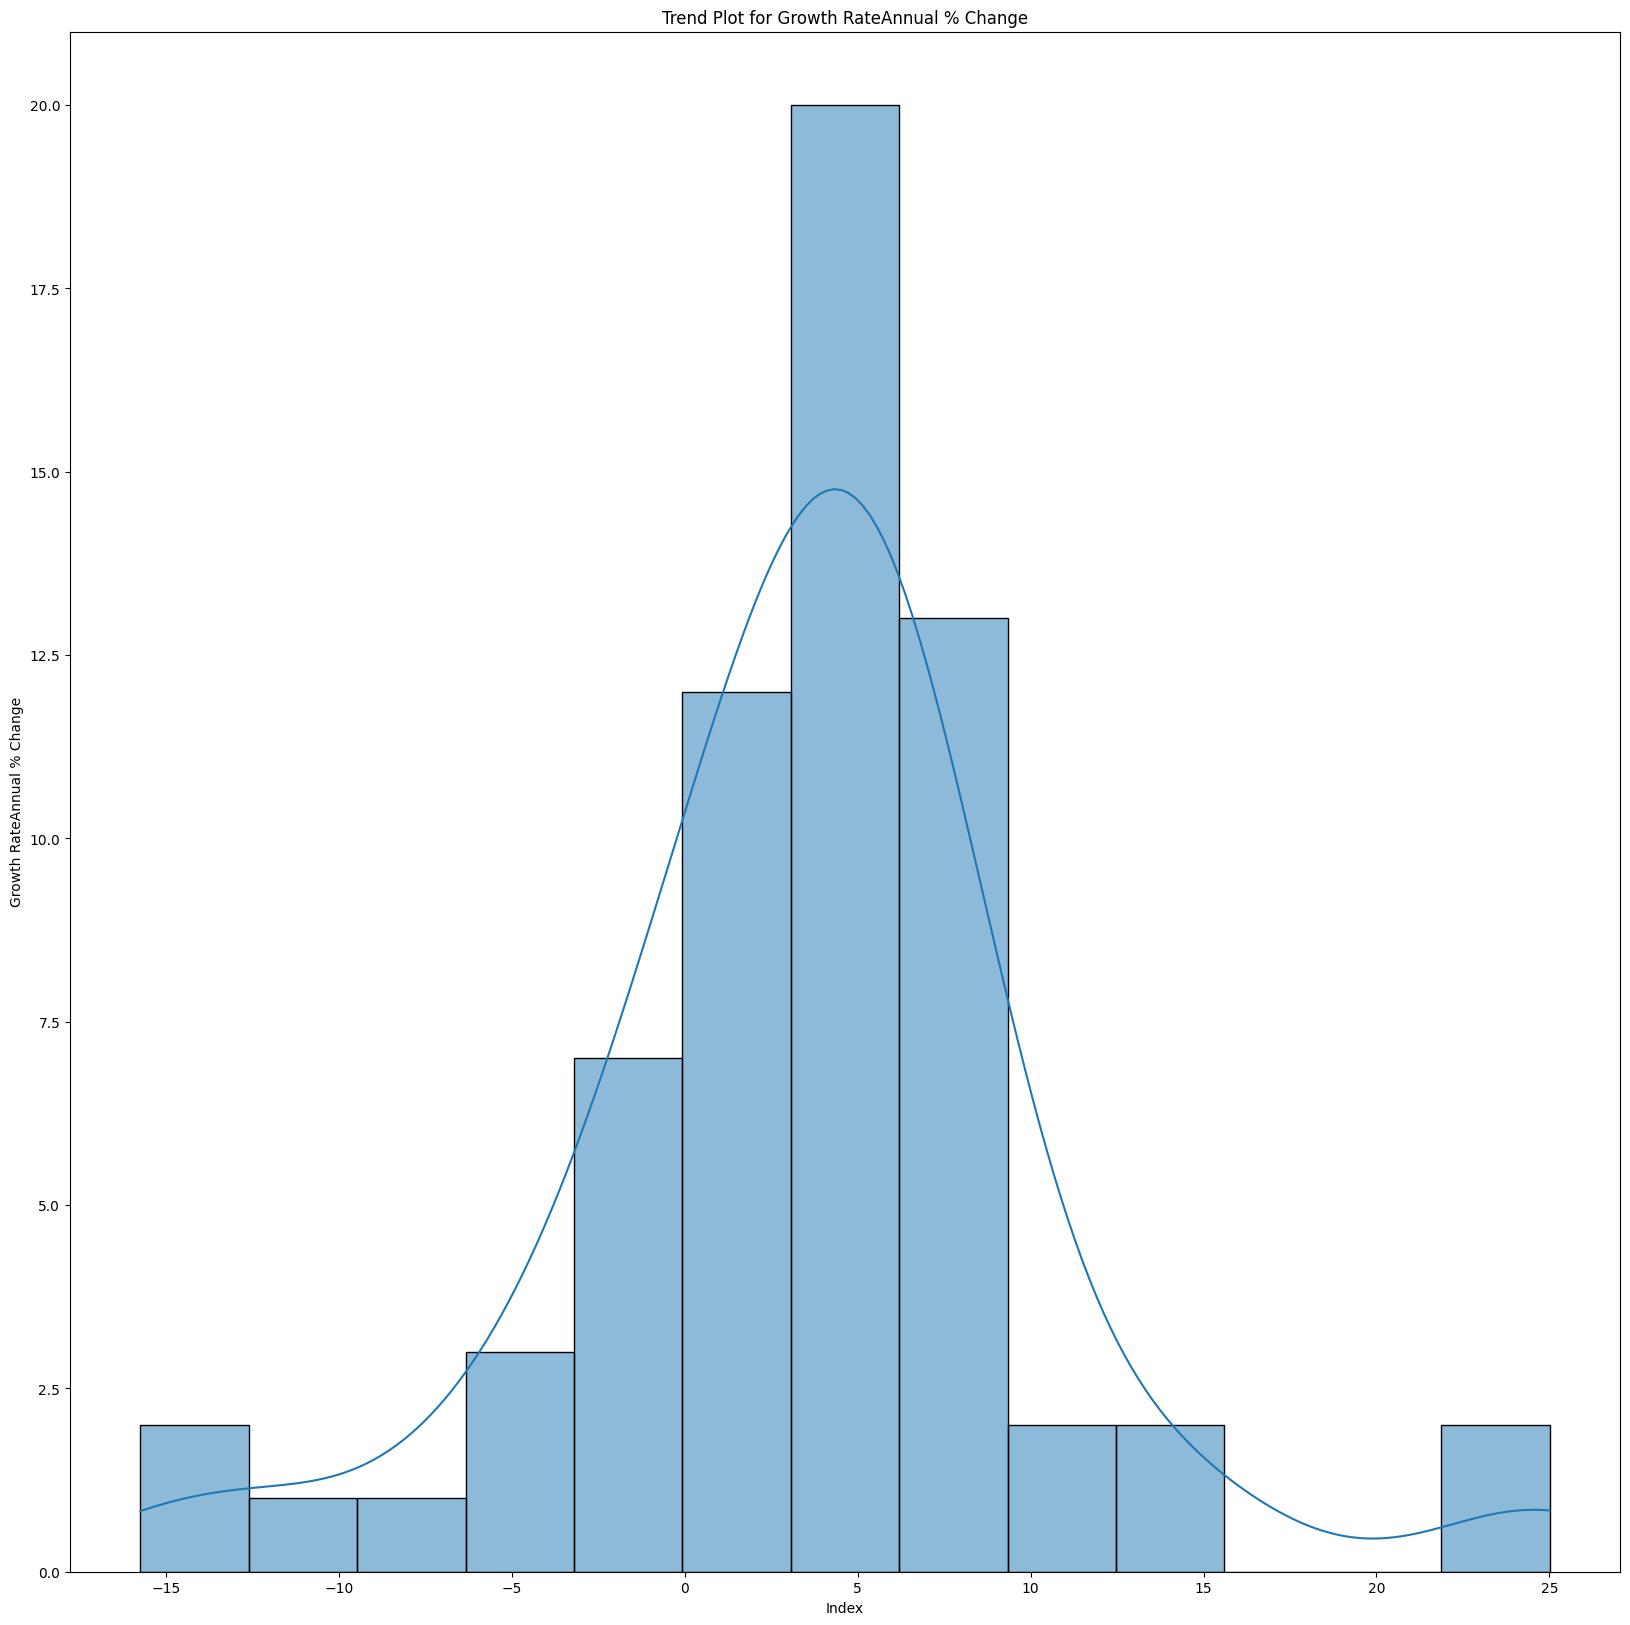

In [13]:
# Loop through each column and create a line plot
selected_cols = sel_table[sel_table.columns]
for column in selected_cols.columns:
    plt.figure(figsize=(20, 20))
    sns.histplot(data[column],kde = True)
    plt.title(f'Trend Plot for {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()

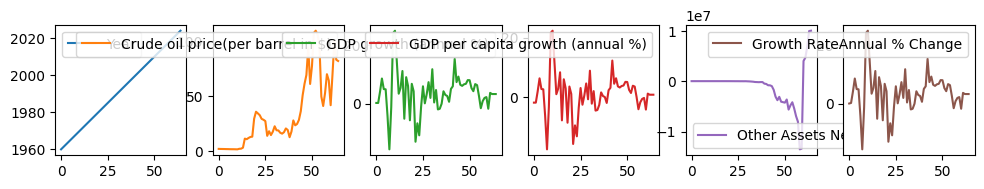

In [14]:
sel_table[sel_table.columns].plot(kind='line', subplots=True, layout=(10, 10), figsize=(20, 20), sharex=False, sharey=False)
plt.show()

In [15]:
sel_table[sel_table.columns].corr()

,Year,Crude oil price(per barrel in $),GDP growth (annual %),GDP per capita growth (annual %),Other Assets Net,Growth RateAnnual % Change
Year,1.000000,0.821016,0.026368,0.012650,-0.198842,0.027108
Crude oil price(per barrel in $),0.821016,1.000000,0.037430,0.023530,-0.216177,0.037864
GDP growth (annual %),0.026368,0.037430,1.000000,0.999276,-0.036769,0.999994
GDP per capita growth (annual %),0.012650,0.023530,0.999276,1.000000,-0.029472,0.999237
Other Assets Net,-0.198842,-0.216177,-0.036769,-0.029472,1.000000,-0.036867
Growth RateAnnual % Change,0.027108,0.037864,0.999994,0.999237,-0.036867,1.000000


<Axes: >

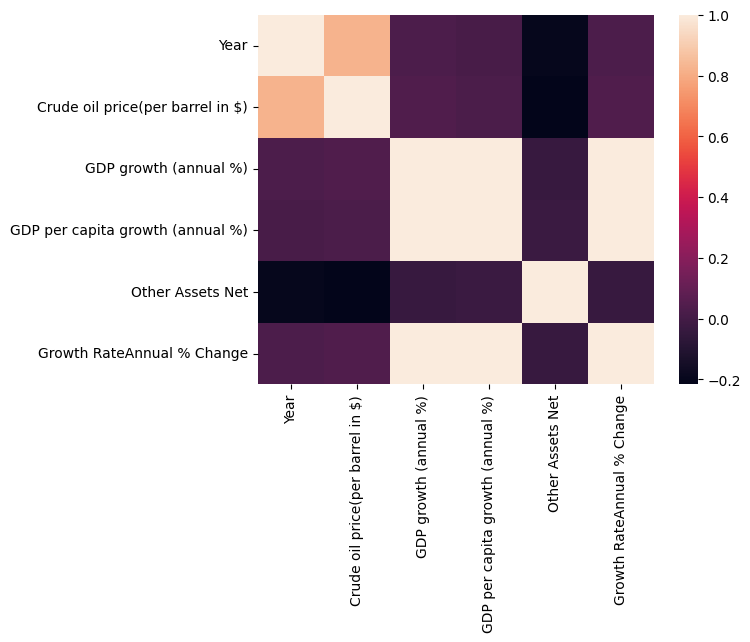

In [16]:
sns.heatmap(sel_table[sel_table.columns].corr(),)

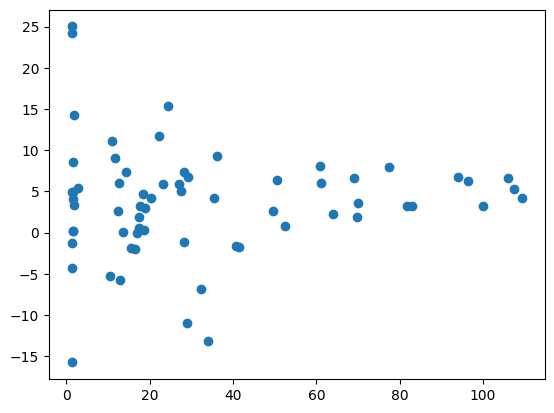

In [17]:
plt.scatter(sel_table['Crude oil price(per barrel in $)'],sel_table['GDP growth (annual %)'])
plt.show()

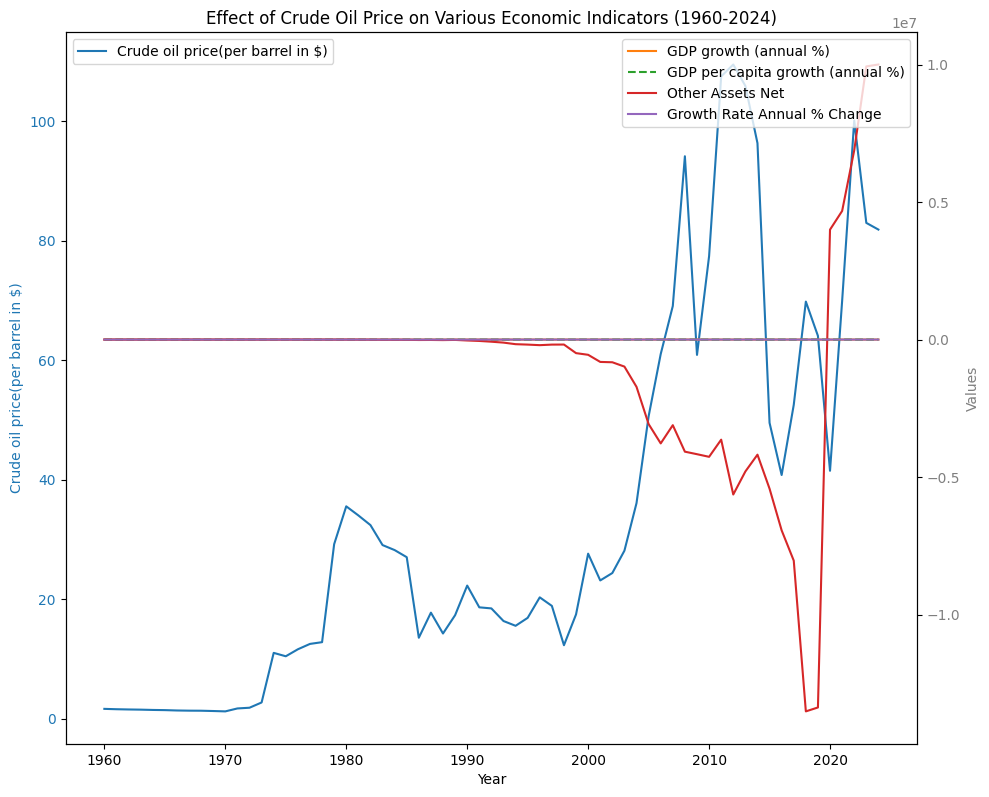

In [24]:
sel_table['Year'] = pd.to_datetime(sel_table['Year'], format='%Y')

# Plotting
fig, ax1 = plt.subplots(figsize=(10,8))

# Plot Crude oil price
ax1.plot(sel_table['Year'], sel_table['Crude oil price(per barrel in $)'], color='tab:blue', label='Crude oil price(per barrel in $)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Crude oil price(per barrel in $)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a twin Axes sharing the xaxis
ax2 = ax1.twinx()

# Plot GDP growth
ax2.plot(sel_table['Year'], sel_table['GDP growth (annual %)'], color='tab:orange', label='GDP growth (annual %)')
ax2.plot(sel_table['Year'], sel_table['GDP per capita growth (annual %)'], color='tab:green', label='GDP per capita growth (annual %)', linestyle='--')
ax2.plot(sel_table['Year'], sel_table['Other Assets Net'], color='tab:red', label='Other Assets Net')
ax2.plot(sel_table['Year'], sel_table['Growth RateAnnual % Change'], color='tab:purple', label='Growth Rate Annual % Change')

ax2.set_ylabel('Values', color='tab:gray')
ax2.tick_params(axis='y', labelcolor='tab:gray')

# Add legends
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.title('Effect of Crude Oil Price on Various Economic Indicators (1960-2024)')
plt.show()

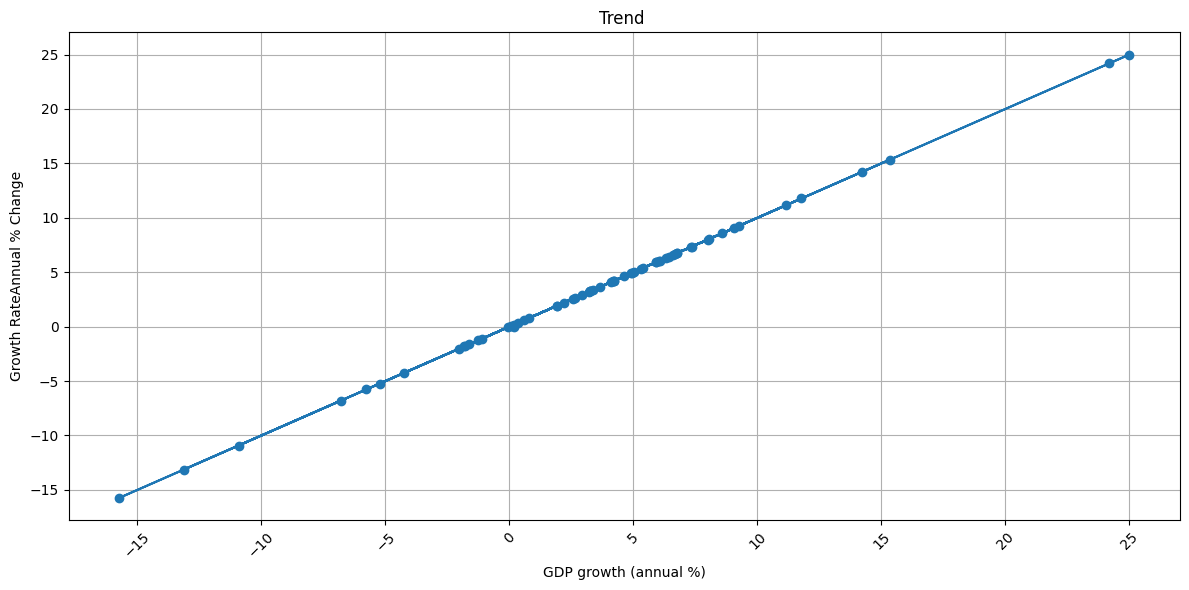

In [23]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(sel_table['GDP growth (annual %)'],sel_table['Growth RateAnnual % Change'], marker='o', linestyle='-')
plt.title('Trend ')
plt.xlabel('GDP growth (annual %)')
plt.xticks(rotation=45)
plt.ylabel('Growth RateAnnual % Change')
plt.grid(True)
plt.tight_layout()
plt.show()

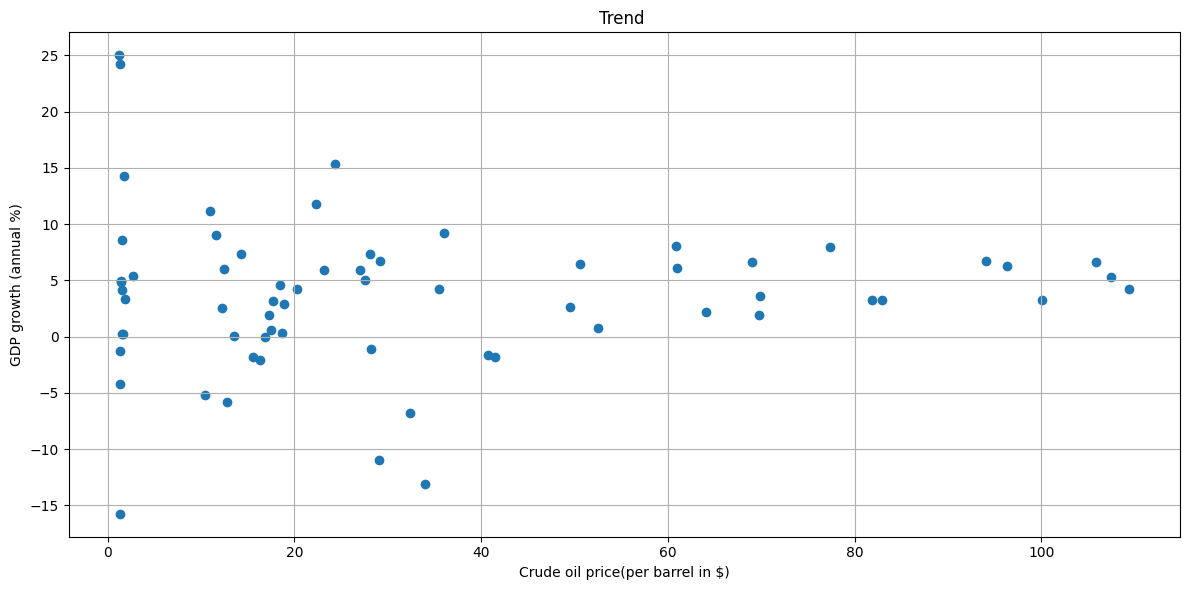

In [25]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.scatter(sel_table['Crude oil price(per barrel in $)'],sel_table['GDP growth (annual %)'])
plt.title('Trend ')
plt.xlabel('Crude oil price(per barrel in $)')
plt.ylabel('GDP growth (annual %)')
plt.grid(True)
plt.tight_layout()
plt.show()

From the graph, it can be seen that the points are more densely populated when the price of oil is between 0 - 40 dollar pre barrel which signifies a high level of variability and the points are more distributed when the price is more than 40 dollars per barrel. This shows that has the price of crude oil increases, there is more stability in the GDP. However, there is no direct linear relationship between oil prices and GDP growth. This implies that there are other factors alongside fuel price that affects GDP.